# Manövererkennung aus dem KITTY Vision Dataset
## Alle Dateien laden

In [332]:
import loadkittidata as kitti
import pandas as pd
import matplotlib.pyplot as plt

#Die Rohadten sind auf http://www.cvlibs.net/datasets/kitti/raw_data.php zu finden

# Change this to the directory where you store KITTI data
basedir = '/Users/marco/Forschungsprojekt/Data'

# Specify the dataset to load
#5 Dates
date1 = '2011_09_26'
date2 = '2011_09_28'
date3 = '2011_09_29'
date4 = '2011_09_30'
date5 = '2011_10_03'

#62 Drives
date1_drives = []
date1_drives.append('0001')#0
date1_drives.append('0002')#1
date1_drives.append('0005')#2
date1_drives.append('0009')#3
date1_drives.append('0011')#4
date1_drives.append('0013')#5
date1_drives.append('0014')#6
date1_drives.append('0015')#7
date1_drives.append('0017')#8
date1_drives.append('0018')#9
date1_drives.append('0019')#10
date1_drives.append('0020')#11
date1_drives.append('0022')#12
date1_drives.append('0023')#13
date1_drives.append('0027')#14
date1_drives.append('0028')#15
date1_drives.append('0029')#16
date1_drives.append('0032')#17
date1_drives.append('0035')#18
date1_drives.append('0036')#19
date1_drives.append('0039')#20
date1_drives.append('0046')#21
date1_drives.append('0048')#22
date1_drives.append('0051')#23
date1_drives.append('0052')#24
date1_drives.append('0057')#25
date1_drives.append('0059')#26
date1_drives.append('0060')#27
date1_drives.append('0061')#28
date1_drives.append('0064')#29
date1_drives.append('0070')#30
date1_drives.append('0079')#31
date1_drives.append('0084')#32
date1_drives.append('0086')#33
date1_drives.append('0087')#34
date1_drives.append('0091')#35
date1_drives.append('0093')#36
date1_drives.append('0095')#37
date1_drives.append('0096')#38
date1_drives.append('0101')#39
date1_drives.append('0104')#40
date1_drives.append('0106')#41
date1_drives.append('0113')#42
date1_drives.append('0117')#43

date2_drives = []
date2_drives.append('0001')#44
date2_drives.append('0002')#45
date2_drives.append('0037')#46
date2_drives.append('0038')#47

date3_drives = []
date3_drives.append('0004')#48
date3_drives.append('0026')#49
date3_drives.append('0071')#50

date4_drives = []
date4_drives.append('0016')#51
date4_drives.append('0018')#52
date4_drives.append('0020')#53
date4_drives.append('0027')#54
date4_drives.append('0028')#55
date4_drives.append('0033')#56
date4_drives.append('0034')#57

date5_drives = []
date5_drives.append('0027')#58
date5_drives.append('0034')#59
date5_drives.append('0042')#60
date5_drives.append('0047')#61

In [333]:
#List to store arrays
data_array = []
#add arrays for date1
for d1 in range(len(date1_drives)):
    data_array.append(kitti.load(basedir, date1, date1_drives[d1]))
    
#add arrays for date2
for d2 in range(len(date2_drives)):
    data_array.append(kitti.load(basedir, date2, date2_drives[d2]))
    
#add arrays for date3
for d3 in range(len(date3_drives)):
    data_array.append(kitti.load(basedir, date3, date3_drives[d3]))
    
#add arrays for date4
for d4 in range(len(date4_drives)):
    data_array.append(kitti.load(basedir, date4, date4_drives[d4]))
    
#add arrays for date5
for d5 in range(len(date5_drives)):
    data_array.append(kitti.load(basedir, date5, date5_drives[d5]))

In [1304]:
#create dataframes for all drives
df = []
for x in range(len(data_array)):
    helper = pd.DataFrame(data_array[x].oxts)
    helper.columns = [data_array[x].getcolumns]
    helper.insert(0,'Timestamp',data_array[x].timestamps)
    df.append(helper.drop(['alt','roll', 'pitch','yaw','wx','wy','wz','wf','wl','wu','pos_accuracy','vel_accuracy','navstat','numsats','posmode','velmode','orimode'] , axis=1))

C:\Users\marco\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


# Windows erstellen

In [335]:
def trip_to_windows(trip_df):
    window_length = 150 # Die Abtastrate beträgt 10 Hz, also 10 Datenpunkte pro Sekunde und wir legen die Größe des Fensters auf 15 Sekunden fest.
    # Wir machen also eine Schleife, die alle 15 Sekunden einen neuen Dateframe erzeugt.
    windows = dict()
    trip_length = len(trip_df)
    indexing_1 = range(1,trip_length,window_length)
    indexing_2 = range(1+75,trip_length-75,window_length)
    counter = 0
    # Wir führen das Windowing gleich zweimal durch, nämlich um überlappende Fenster zu erhalten, damit wir möglichst kein Event vergessen, das "zerteilt" worden würde.
    for window_num_1 in indexing_1:
        windows[counter] = trip_df.iloc[window_num_1:(window_num_1+window_length)]
        counter+=1
    for window_num_2 in indexing_2:
        windows[counter] = trip_df.iloc[window_num_2:(window_num_2+window_length)]
        counter+=1
    return windows
    
window_list = dict()
for trip_num in range(len(df)):
    window_list[trip_num] = trip_to_windows(df[trip_num])

# Flatten der doppelten Dict-Struktur. Nicht elegant, aber ausführlich. Wer kann, macht das besser.

all_windows = dict()
trips_in_list = len(window_list)
counter = 0
for trip_iterator in range(trips_in_list):
    windows_in_trip = len(window_list[trip_iterator])
    for window_iterator in range(windows_in_trip):
        all_windows[counter] = window_list[trip_iterator][window_iterator]
        counter+=1

print("Datenstruktur geflattet. Es gibt insgesamt",str(len(all_windows)),"Windows.")

# Was haben wir hier jetzt für eine Datenstruktur? Das ist also eine Liste, die alle Dataframes aller erzeugten Windows enthält.

Datenstruktur geflattet. Es gibt insgesamt 560 Windows.


In [336]:
# Schauen wir einmal ein beispiel davon an:
test_window = all_windows[0]
test_window

,Timestamp,lat,lon,vn,ve,vf,vl,vu,ax,ay,az,af,al,au
1,2011-09-26 13:02:26.074347,49.014997,8.434280,-6.769916,-11.250719,13.129880,-0.129612,0.008514,-0.535562,0.186717,10.078282,-0.447682,-0.178040,10.082737
2,2011-09-26 13:02:26.174598,49.014991,8.434265,-6.731519,-11.221558,13.084994,-0.140397,0.024200,-0.513504,0.145090,9.891730,-0.440583,-0.213206,9.894047
3,2011-09-26 13:02:26.274369,49.014985,8.434249,-6.684933,-11.198743,13.041455,-0.144497,0.038985,-0.473514,0.089088,10.091065,-0.415004,-0.272786,10.090378
4,2011-09-26 13:02:26.384417,49.014979,8.434233,-6.634209,-11.175295,12.995313,-0.148616,0.068896,-0.491050,0.035327,10.022575,-0.432911,-0.313695,10.020443
5,2011-09-26 13:02:26.484389,49.014973,8.434217,-6.575988,-11.150717,12.944546,-0.146018,0.067685,-0.597573,-0.033463,9.730662,-0.525313,-0.366592,9.728051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2011-09-26 13:02:36.594849,49.014603,8.432997,-1.979818,-4.854709,5.242888,0.001995,-0.021268,-1.668487,0.102221,9.930910,-1.474333,-0.249806,9.958993
104,2011-09-26 13:02:36.695062,49.014602,8.432991,-1.909403,-4.718891,5.090529,0.016331,-0.020800,-1.773146,0.432407,9.690233,-1.573140,0.045300,9.734832
105,2011-09-26 13:02:36.804849,49.014600,8.432984,-1.876932,-4.541390,4.913938,-0.018810,-0.022621,-1.790818,0.954975,9.738853,-1.586329,0.535977,9.806563
106,2011-09-26 13:02:36.904850,49.014598,8.432978,-1.855397,-4.383722,4.759856,-0.057585,-0.023613,-1.684842,0.667126,9.760997,-1.487871,0.263407,9.812453


# Manöver definieren

## Kategorien

Die Kategorien wurden nach Ansicht der Bilddaten bestimmt

### **Beschleunigen:**
- Sanftes beschleunigen (0,1 m/s^2 < x < 1,5 m/s^2)
- Normales beschleunigen (1,5 m/s^2 < x < 2,5 m/s^2)
- Starkes beschleunigen (x > 2,5 m/s^2)

*Betrachteter Wert: 
af: forward acceleration (m/s^2)*

### **Bremsen:** 
- Sanftes bremsen (-0,1 m/s^2 > x > -2 m/s^2)
- Normales bremsen (-2 m/s^2 > x > -3 m/s^2)
- Starkes bremsen (x < -3 m/s^2)
- Starkes bremsen mit Stillstand (x < -3 m/s^2 AND x < 0,5 m/s)
- Notbremse (x < -5 m/s^2)??

*Betrachteter Wert: 
af: forward acceleration (m/s^2),
vf: forward velocity, i.e. parallel to earth-surface (m/s)*

### **Rechtsabbiegen:**
- Kurve (-1,5 m/s^2 > x > -3 m/s^2)
- Beschleunigte/Scharfe Kurve (x < -3 m/s^2) 

*Betrachteter Wert: 
al: leftward acceleration (m/s^2)*

### **Linksabbiegen:**
- Kurve (1,5 m/s^2 < x < 3 m/s^2)
- Beschleunigte/Scharfe Kurve (x > 3 m/s^2)

*Betrachteter Wert: 
al: leftward acceleration (m/s^2)*

### Probleme:
- Kurven bei niedriger Geschwindigkeit werden übersehen
- Ausweichen wird als Kurve angesehen
- Werte sind nicht wissenschaftlich bestätigt

## Feature Matrix erstellen

In [618]:
import numpy as np

window_num = len(all_windows)
index_list = np.arange(window_num)

hat_starkes_bremsen = np.zeros(window_num)
hat_starkes_beschleunigen = np.zeros(window_num)
hat_scharfe_rechtskurve = np.zeros(window_num)
hat_scharfe_linkskurve = np.zeros(window_num)

def check_for_accel_event(test_window):
    stabrem = test_window[['af']]
    stabrem_describe = stabrem.describe()
    beschl = stabrem_describe.loc['max'] 
    if float(beschl) > 2.5:
        return 1
    return 0

def check_for_left_event(test_window):
    stabrem = test_window[['al']]
    stabrem_describe = stabrem.describe()
    beschl = stabrem_describe.loc['max'] 
    if float(beschl) > 3:
        return 1
    return 0

def check_for_right_event(test_window):
    stabrem = test_window[['al']]
    stabrem_describe = stabrem.describe()
    beschl = stabrem_describe.loc['min'] 
    if float(beschl) < -3:
        return 1
    return 0

def check_for_brake_event(test_window):
    stabrem = test_window[['af']]
    stabrem_describe = stabrem.describe()
    bremsen = stabrem_describe.loc['min'] 
    if float(bremsen) < -3:
        return 1
    return 0

speed_min = np.zeros(window_num)       # Weiterhin erzeugen wir Platzhalter für verschiedene abgeleitete Merkmale der Windows, so z.B. die minimale Geschwindigkeit
speed_max = np.zeros(window_num)
speed_diff = np.zeros(window_num)
speed_mean = np.zeros(window_num)
speed_var = np.zeros(window_num)

acc_x_min = np.zeros(window_num)
acc_x_max = np.zeros(window_num)
acc_x_diff = np.zeros(window_num)
acc_x_mean = np.zeros(window_num)
acc_x_var = np.zeros(window_num)

# Nächster Schritt: Die Berechnung aller dieser Größen für jedes einzelne Fenster. Das Ergebnis fassen wir in einem Data Frame zusammen.

for window_iterator in range(window_num):
    window_df = all_windows[window_iterator]
    hat_starkes_beschleunigen[window_iterator] = check_for_accel_event(window_df)
    hat_starkes_bremsen[window_iterator] = check_for_brake_event(window_df)
    hat_scharfe_rechtskurve[window_iterator] = check_for_right_event(window_df)
    hat_scharfe_linkskurve[window_iterator] = check_for_left_event(window_df)
    
    speed_min[window_iterator] = np.min(window_df[['vf']])
    speed_max[window_iterator] = np.max(window_df[['vf']])
    speed_diff[window_iterator] = np.abs(speed_max[window_iterator]-speed_min[window_iterator])
    speed_mean[window_iterator] = np.mean(window_df[['vf']])
    speed_var[window_iterator] = np.var(window_df[['vf']])
    
    acc_x_min[window_iterator] = np.min(window_df[['af']])
    acc_x_max[window_iterator] = np.max(window_df[['af']])
    acc_x_diff[window_iterator] = np.abs(acc_x_max[window_iterator]-acc_x_min[window_iterator])
    acc_x_mean[window_iterator] = np.mean(window_df[['af']])
    acc_x_var[window_iterator] = np.var(window_df[['af']])
    
data_template = list(zip(index_list,speed_min,speed_max,speed_diff,speed_mean,speed_var,acc_x_min,acc_x_max,acc_x_diff,acc_x_mean,acc_x_var,hat_starkes_bremsen,hat_starkes_beschleunigen,hat_scharfe_rechtskurve,hat_scharfe_linkskurve))
df_windows = pd.DataFrame(data_template,columns=['Window_Index','Speed_Min','Speed_Max','Speed_Diff','Speed_Mean','Speed_Var','Acc_X_Min','Acc_X_Max','Acc_X_Diff','Acc_X_Mean','Acc_X_Var','Hat_Starkes_Bremsen','Hat_Starkes_Beschleunigen','Hat_Scharfe_Rechtskurve','Hat_Scharfe_Linkskurve'])

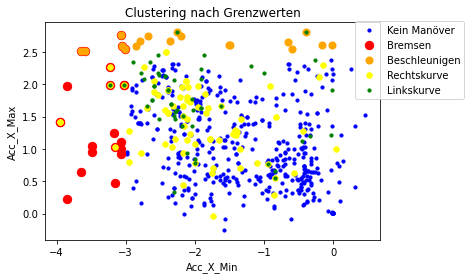

In [1320]:
x = 5 #X-Achse welche dargestellt werden soll
y = 6 #Y-Achse welche dargestellt werden soll

df_rest = df_windows[(df_windows['Hat_Starkes_Bremsen'] == 0) & (df_windows['Hat_Starkes_Beschleunigen'] == 0) & (df_windows['Hat_Scharfe_Rechtskurve'] == 0) & (df_windows['Hat_Scharfe_Linkskurve'] == 0)]
df_rest_manöver = df_rest[['Speed_Min','Speed_Max','Speed_Diff','Speed_Mean','Speed_Var','Acc_X_Min','Acc_X_Max','Acc_X_Diff','Acc_X_Mean','Acc_X_Var']]
plt.scatter(df_rest_manöver.iloc[:, x], df_rest_manöver.iloc[:, y], c='blue', label='Kein Manöver', s=10)

df_grenzw_br = df_windows[(df_windows['Hat_Starkes_Bremsen'] == 1)]
df_grenzw_bremsen = df_grenzw_br[['Speed_Min','Speed_Max','Speed_Diff','Speed_Mean','Speed_Var','Acc_X_Min','Acc_X_Max','Acc_X_Diff','Acc_X_Mean','Acc_X_Var']]
plt.scatter(df_grenzw_bremsen.iloc[:, x], df_grenzw_bremsen.iloc[:, y], c='red', label='Bremsen', s=70)

df_grenzw_be = df_windows[(df_windows['Hat_Starkes_Beschleunigen'] == 1)]
df_grenzw_beschl = df_grenzw_be[['Speed_Min','Speed_Max','Speed_Diff','Speed_Mean','Speed_Var','Acc_X_Min','Acc_X_Max','Acc_X_Diff','Acc_X_Mean','Acc_X_Var']]
plt.scatter(df_grenzw_beschl.iloc[:, x], df_grenzw_beschl.iloc[:, y], c='orange', label='Beschleunigen', s=50)

df_grenzw_re = df_windows[(df_windows['Hat_Scharfe_Rechtskurve'] == 1)]
df_grenzw_rechts = df_grenzw_re[['Speed_Min','Speed_Max','Speed_Diff','Speed_Mean','Speed_Var','Acc_X_Min','Acc_X_Max','Acc_X_Diff','Acc_X_Mean','Acc_X_Var']]
plt.scatter(df_grenzw_rechts.iloc[:, x], df_grenzw_rechts.iloc[:, y], c='yellow', label='Rechtskurve', s=30)

df_grenzw_li = df_windows[(df_windows['Hat_Scharfe_Linkskurve'] == 1)]
df_grenzw_links = df_grenzw_li[['Speed_Min','Speed_Max','Speed_Diff','Speed_Mean','Speed_Var','Acc_X_Min','Acc_X_Max','Acc_X_Diff','Acc_X_Mean','Acc_X_Var']]
plt.scatter(df_grenzw_links.iloc[:, x], df_grenzw_links.iloc[:, y], c='green', label='Linkskurve', s=10)

colname_x = grenzw_df.columns[x]
colname_y = grenzw_df.columns[y]
plt.xlabel(colname_x)
plt.ylabel(colname_y)
plt.title('Clustering nach Grenzwerten')
#plt.legend()
plt.legend(bbox_to_anchor=(0.91, 1.03), loc='upper left')
plt.savefig('TestGrenzwert.png')
plt.show()

In [1262]:
window_num = len(all_windows)
Grenzwerte = np.zeros(window_num)

def check_grenzwert(test_window):
    stabrem_af = test_window[['af']]
    stabrem_al = test_window[['al']]
    stabrem_describe_af = stabrem_af.describe()
    stabrem_describe_al = stabrem_al.describe()
    beschl = stabrem_describe_af.loc['max'] 
    bremsen = stabrem_describe_af.loc['min'] 
    rech = stabrem_describe_al.loc['min']
    link = stabrem_describe.loc['max'] 
    if float(beschl) > 2.5:
        #1 = Starke Beschleunigung
        return 1
    elif float(bremsen) < -3:
        #2 = Starkes bremsen
        return 2
    elif float(link) > 3:
        #3 = Scharfe Linkskurve
        return 3
    elif float(rech) < -3:
        #4 = Scharfe Rechtskurve
        return 4
    else:
        #0 Kein definiertes Manöver
        return 0
    
for window_iterator in range(window_num):
    window_df = all_windows[window_iterator]
    Grenzwerte[window_iterator] = check_grenzwert(window_df)
    
grenzwert_df = df_windows
grenzwert_df['Grenzwerte'] = Grenzwerte

In [ ]:
grenzwert_df

## Entscheidungsbaum

In [1399]:
from sklearn.model_selection import train_test_split
dtrain_complete = grenzwert_df.drop(['Window_Index','K-Means','DBScan'],axis=1) # Drop Index
dtrain_wo_targets = dtrain_complete.drop(['Hat_Starkes_Bremsen','Hat_Starkes_Beschleunigen','Hat_Scharfe_Rechtskurve','Hat_Scharfe_Linkskurve','Grenzwerte'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(dtrain_wo_targets,dtrain_complete['Grenzwerte'],test_size=0.2)

In [1400]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(random_state=0,max_depth=4)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.875
0.9017857142857143


In [1401]:
clf.get_depth()

4

In [1402]:
X_train

,Speed_Min,Speed_Max,Speed_Diff,Speed_Mean,Speed_Var,Acc_X_Min,Acc_X_Max,Acc_X_Diff,Acc_X_Mean,Acc_X_Var
521,10.910547,11.843713,0.933167,11.565993,0.026600,-0.286006,1.020009,1.306015,0.047407,0.046549
517,11.913705,12.991329,1.077624,12.716309,0.103066,-0.499371,0.321390,0.820760,0.061477,0.016646
510,5.997655,10.069405,4.071749,8.309378,1.748965,-1.804023,0.958548,2.762571,0.026180,0.391221
65,14.866580,17.018652,2.152072,16.273139,0.383482,-1.058567,0.497779,1.556346,0.058465,0.070080
422,2.288405,8.725564,6.437159,6.794300,3.931826,-2.244167,0.933940,3.178107,-0.212418,0.737443
...,...,...,...,...,...,...,...,...,...,...
16,14.847200,15.014301,0.167101,14.904057,0.003333,-0.073497,0.332224,0.405721,0.114727,0.010403
367,3.327866,10.131230,6.803364,6.879376,4.157108,-2.389290,1.557962,3.947252,-0.077880,0.837657
175,16.274062,17.153346,0.879285,16.694238,0.042398,-0.329089,0.438569,0.767658,0.041608,0.019095
77,5.636807,8.063855,2.427047,7.143486,0.518422,-1.411413,0.928399,2.339812,0.066789,0.264753


In [1403]:
# Confusion-Matrix
from sklearn.metrics import classification_report, confusion_matrix
clf = DecisionTreeClassifier(random_state=0,max_depth=20)

# Calculate confusion matrix for training set

# Training
clf.fit(X_train,y_train)

# Vorhersage auf Trainingsdaten
y_pred = clf.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

# Calculate confusion matrix for test set

# Vorhersage auf Test-Daten
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[365   0   0   0]
 [  0  15   0   0]
 [  0   0  12   0]
 [  0   0   0  56]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       365
         1.0       1.00      1.00      1.00        15
         2.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        56

    accuracy                           1.00       448
   macro avg       1.00      1.00      1.00       448
weighted avg       1.00      1.00      1.00       448

[[84  0  0  9]
 [ 0  3  0  0]
 [ 0  0  5  0]
 [ 6  0  0  5]]
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92        93
         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         5
         4.0       0.36      0.45      0.40        11

    accuracy                           0.87       112
   macro avg       0.82      0.84      0.83       112
weighted avg       0.88      0.87      0.87    

In [1404]:
from sklearn import tree
print(tree.export_text(clf,feature_names=list(X_train.columns[0:10])))

|--- Acc_X_Max <= 2.50
|   |--- Acc_X_Min <= -3.01
|   |   |--- class: 2.0
|   |--- Acc_X_Min >  -3.01
|   |   |--- Speed_Var <= 0.94
|   |   |   |--- Speed_Max <= 12.39
|   |   |   |   |--- class: 0.0
|   |   |   |--- Speed_Max >  12.39
|   |   |   |   |--- Speed_Mean <= 11.98
|   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- Speed_Mean >  11.98
|   |   |   |   |   |--- Speed_Var <= 0.71
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Speed_Var >  0.71
|   |   |   |   |   |   |--- Acc_X_Max <= 0.62
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Acc_X_Max >  0.62
|   |   |   |   |   |   |   |--- class: 4.0
|   |   |--- Speed_Var >  0.94
|   |   |   |--- Speed_Min <= 5.38
|   |   |   |   |--- Acc_X_Max <= 2.47
|   |   |   |   |   |--- Speed_Var <= 0.99
|   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |--- Speed_Var >  0.99
|   |   |   |   |   |   |--- Speed_Var <= 33.42
|   |   |   |   |   |   |   |--- Acc_X_Var <= 2.05
|   | 

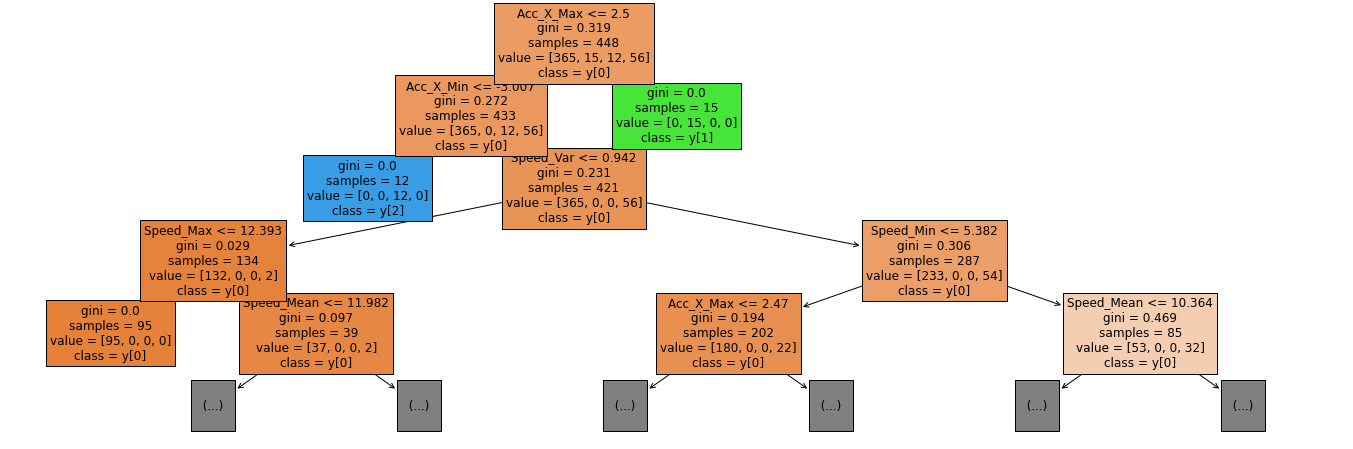

In [1405]:
fig, ax = plt.subplots(figsize=(24, 8))
plot_tree(clf.fit(X_train, y_train), feature_names=X_train.columns, max_depth=4, fontsize=12, filled=True, class_names=True)
plt.show()

# K-Means Clustering

Teile des Codes zur K-Means Methode stammen von https://towardsdatascience.com/k-means-vs-dbscan-clustering-49f8e627de27

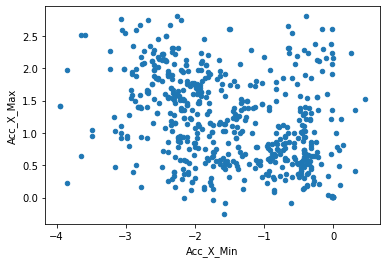

In [340]:
df_windows.plot.scatter(x="Acc_X_Min", y="Acc_X_Max");

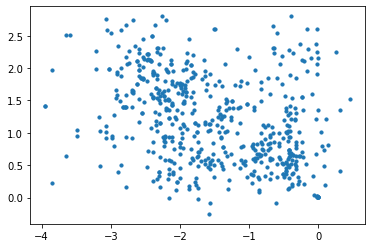

In [1102]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

x = 5 #X-Achse welche dargestellt werden soll
y = 6 #Y-Achse welche dargestellt werden soll

#clusterdf = df_windows[['Acc_X_Min','Acc_X_Max']]
cluster_df = df_windows[['Speed_Max','Speed_Min','Speed_Diff','Speed_Mean','Speed_Var','Acc_X_Min','Acc_X_Max','Acc_X_Diff','Acc_X_Mean','Acc_X_Var']]
X = cluster_df.values
#plt.scatter(X[:, 0], X[:, 0], s=2);
plt.scatter(X[:, x], X[:, y], s=10);

In [891]:
df_windows.head()

,Window_Index,Speed_Min,Speed_Max,Speed_Diff,Speed_Mean,Speed_Var,Acc_X_Min,Acc_X_Max,Acc_X_Diff,Acc_X_Mean,Acc_X_Var,Hat_Starkes_Bremsen,Hat_Starkes_Beschleunigen,Hat_Scharfe_Rechtskurve,Hat_Scharfe_Linkskurve
0,0,4.611723,13.129880,8.518157,9.701534,5.447314,-1.586329,-0.251310,1.335019,-0.782013,0.126272,0.0,0.0,0.0,0.0
1,1,8.671378,12.567631,3.896252,10.446991,1.443912,0.054576,0.790332,0.735755,0.506240,0.027690,0.0,0.0,0.0,0.0
2,2,3.068091,6.402436,3.334345,4.485738,1.035488,-0.656318,0.991537,1.647854,0.204065,0.137706,0.0,0.0,0.0,0.0
3,3,6.425754,6.458642,0.032888,6.443187,0.000182,0.099059,0.199518,0.100459,0.145831,0.001706,0.0,0.0,0.0,0.0
4,4,3.899331,6.458642,2.559311,5.320468,0.637334,-0.244810,0.854590,1.099399,0.314187,0.078581,0.0,0.0,0.0,0.0


[4 1 0 0 0 1 2 2 2 4 2 0 4 1 2 1 3 1 3 2 1 4 0 0 2 0 1 2 2 0 2 4 0 0 2 4 4
 4 0 4 1 4 1 4 4 4 1 1 1 1 1 1 3 3 3 3 3 3 3 3 2 0 4 2 2 3 1 3 1 1 4 4 4 2
 1 2 0 4 4 1 1 2 4 4 4 1 4 0 1 1 4 2 2 0 0 0 0 4 0 2 4 2 4 2 4 0 4 1 4 4 4
 4 1 4 4 4 1 4 4 1 1 4 2 3 3 1 3 0 2 1 4 4 2 4 0 0 0 0 4 0 0 0 0 0 0 0 0 0
 0 0 0 4 4 0 0 0 0 2 0 4 2 1 1 1 2 1 2 0 4 1 2 2 1 3 3 3 3 1 2 3 3 3 3 2 1
 1 1 1 1 2 4 4 0 4 0 0 0 0 4 0 0 0 2 2 0 0 0 0 0 0 2 0 0 4 4 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 3 1 4 4 4 4 1 4 4 4 4 1 2 4 2 4 4 2 2 1 1 4 4 4 4
 4 4 4 4 4 2 1 4 1 2 2 2 1 1 1 4 2 1 2 1 1 1 1 2 4 1 2 1 4 4 4 4 4 2 4 4 0
 4 4 4 2 2 4 0 4 4 4 4 2 1 4 2 1 1 4 4 4 4 4 4 4 4 2 2 4 4 4 4 4 1 4 4 1 1
 4 1 2 4 2 4 4 4 2 4 4 4 2 1 4 4 4 4 4 4 4 4 4 2 2 4 4 4 4 2 1 4 1 1 4 1 4
 1 2 2 1 1 1 1 1 1 4 1 1 4 1 1 1 1 1 1 4 1 1 2 4 4 1 1 2 2 2 2 0 1 4 1 4 1
 2 2 0 4 4 4 2 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 1 1 4 1 4 4 4
 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 2 1 1 2 2 1 1 1 1 1 4 4 4 4 1
 1 2 1 4 1 1 1 4 1 1 1 1 

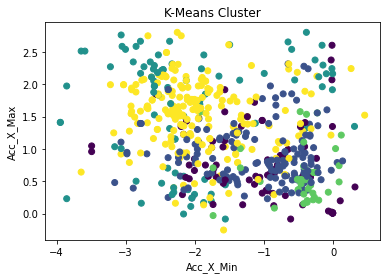

In [1380]:
from sklearn.cluster import KMeans
from sklearn import metrics

x = 5 #X-Achse welche dargestellt werden soll
y = 6 #Y-Achse welche dargestellt werden soll

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
s = metrics.silhouette_score(X, y_kmeans, metric='euclidean')
print(f'Silhouette Coefficient for the Dataset Clusters: {s:.2f}')
plt.scatter(X[:, x], X[:, y], c=y_kmeans)
plt.title('K-Means Cluster')
coname_x = cluster_df.columns[x]
coname_y = cluster_df.columns[y]
plt.xlabel(coname_x)
plt.ylabel(coname_y)
plt.savefig('KMeans.png')
plt.show()

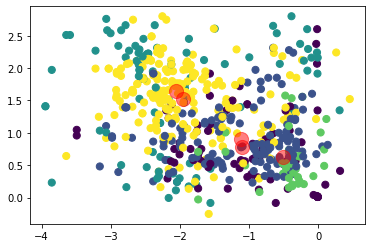

In [1381]:
plt.scatter(X[:, 5], X[:, 6], c=y_kmeans, s=50)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 5], centroids[:, 6], c='red', s=200, alpha=0.5);

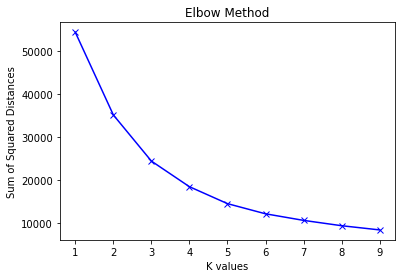

In [1382]:
# Arbitrarily selecting a range of values for K
K = range(1,10)
sum_of_squared_distances = []
# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

### Entscheidungsbaum mit K-Means Clustering

In [1410]:
#from sklearn.model_selection import train_test_split

#kmeans_df = df_windows[['Window_Index','Speed_Max','Speed_Min','Speed_Diff','Speed_Mean','Speed_Var','Acc_X_Min','Acc_X_Max','Acc_X_Diff','Acc_X_Mean','Acc_X_Var']]
#kmeans_df.insert(0,'K-Means',y_kmeans)
#dtrain_complete_kmeans = kmeans_df.drop(['Window_Index'],axis=1) # Drop Index
#dtrain_wo_targets_kmeans = dtrain_complete_kmeans.drop(['K-Means'],axis=1)

#X_train_kmeans, X_test_kmeans, y_train_kmeans, y_test_kmeans = train_test_split(dtrain_wo_targets_kmeans,dtrain_complete_kmeans['K-Means'],test_size=0.2)
help_df = df_windows.drop(['K-Means','DBScan'],axis=1)
kmeans_df = help_df
kmeans_df.insert(0,'K-Means',y_kmeans)
dtrain_complete_kmeans = kmeans_df.drop(['Window_Index'],axis=1) # Drop Index
dtrain_wo_targets_kmeans = dtrain_complete_kmeans.drop(['Hat_Starkes_Bremsen','Hat_Starkes_Beschleunigen','Hat_Scharfe_Rechtskurve','Hat_Scharfe_Linkskurve','Grenzwerte'],axis=1)

In [1406]:
df_windows

,K-Means,DBScan,Window_Index,Speed_Min,Speed_Max,Speed_Diff,Speed_Mean,Speed_Var,Acc_X_Min,Acc_X_Max,Acc_X_Diff,Acc_X_Mean,Acc_X_Var,Hat_Starkes_Bremsen,Hat_Starkes_Beschleunigen,Hat_Scharfe_Rechtskurve,Hat_Scharfe_Linkskurve,Grenzwerte
0,0,-1,0,4.611723,13.129880,8.518157,9.701534,5.447314,-1.586329,-0.251310,1.335019,-0.782013,0.126272,0.0,0.0,0.0,0.0,0.0
1,3,0,1,8.671378,12.567631,3.896252,10.446991,1.443912,0.054576,0.790332,0.735755,0.506240,0.027690,0.0,0.0,0.0,0.0,0.0
2,4,0,2,3.068091,6.402436,3.334345,4.485738,1.035488,-0.656318,0.991537,1.647854,0.204065,0.137706,0.0,0.0,0.0,0.0,0.0
3,4,-1,3,6.425754,6.458642,0.032888,6.443187,0.000182,0.099059,0.199518,0.100459,0.145831,0.001706,0.0,0.0,0.0,0.0,0.0
4,4,0,4,3.899331,6.458642,2.559311,5.320468,0.637334,-0.244810,0.854590,1.099399,0.314187,0.078581,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,-1,555,3.523402,7.745118,4.221716,5.440751,1.981948,-0.475163,1.390242,1.865405,0.130937,0.333317,0.0,0.0,0.0,0.0,0.0
556,0,0,556,5.342322,9.210324,3.868002,7.352478,1.897865,-1.387560,1.089015,2.476575,0.015994,0.380945,0.0,0.0,0.0,0.0,0.0
557,3,-1,557,7.930323,14.938414,7.008091,12.099738,5.186238,-1.258162,1.247075,2.505237,0.249508,0.505088,0.0,0.0,0.0,0.0,0.0
558,3,-1,558,8.736209,14.385658,5.649449,11.409726,4.340846,-1.437421,1.392344,2.829765,0.161508,0.522421,0.0,0.0,0.0,0.0,0.0


In [1384]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf_kmeans = DecisionTreeClassifier(random_state=0,max_depth=4)
clf_kmeans.fit(X_train,y_train)
print(clf_kmeans.score(X_train,y_train))
print(clf_kmeans.score(X_test,y_test))

0.8191964285714286
0.7946428571428571


In [1385]:
# Confusion-Matrix
from sklearn.metrics import classification_report, confusion_matrix
clf_kmeans = DecisionTreeClassifier(random_state=0,max_depth=20)

# Calculate confusion matrix for training set

# Training
clf_kmeans.fit(X_train,y_train)

# Vorhersage auf Trainingsdaten
y_pred_kmeans = clf_kmeans.predict(X_train)
print(confusion_matrix(y_train, y_pred_kmeans))
print(classification_report(y_train, y_pred_kmeans))

# Calculate confusion matrix for test set

# Vorhersage auf Test-Daten
y_pred_kmeans = clf_kmeans.predict(X_test)
print(confusion_matrix(y_test, y_pred_kmeans))
print(classification_report(y_test, y_pred_kmeans))

[[367   0   0   0]
 [  0  15   0   0]
 [  0   0  13   0]
 [  0   0   0  53]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       367
         1.0       1.00      1.00      1.00        15
         2.0       1.00      1.00      1.00        13
         4.0       1.00      1.00      1.00        53

    accuracy                           1.00       448
   macro avg       1.00      1.00      1.00       448
weighted avg       1.00      1.00      1.00       448

[[81  0  2  8]
 [ 0  3  0  0]
 [ 0  0  4  0]
 [ 8  0  0  6]]
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        91
         1.0       1.00      1.00      1.00         3
         2.0       0.67      1.00      0.80         4
         4.0       0.43      0.43      0.43        14

    accuracy                           0.84       112
   macro avg       0.75      0.83      0.78       112
weighted avg       0.84      0.84      0.84    

In [1386]:
from sklearn import tree
print(tree.export_text(clf_kmeans,feature_names=list(X_train.columns[0:10])))

|--- Acc_X_Max <= 2.50
|   |--- Acc_X_Min <= -2.98
|   |   |--- class: 2.0
|   |--- Acc_X_Min >  -2.98
|   |   |--- Speed_Var <= 1.67
|   |   |   |--- Acc_X_Var <= 0.69
|   |   |   |   |--- Speed_Var <= 0.74
|   |   |   |   |   |--- Speed_Min <= 11.03
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Speed_Min >  11.03
|   |   |   |   |   |   |--- Speed_Min <= 11.09
|   |   |   |   |   |   |   |--- Acc_X_Max <= 0.61
|   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |   |--- Acc_X_Max >  0.61
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Speed_Min >  11.09
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Speed_Var >  0.74
|   |   |   |   |   |--- Speed_Var <= 0.75
|   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |--- Speed_Var >  0.75
|   |   |   |   |   |   |--- Acc_X_Var <= 0.08
|   |   |   |   |   |   |   |--- Acc_X_Var <= 0.07
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |  

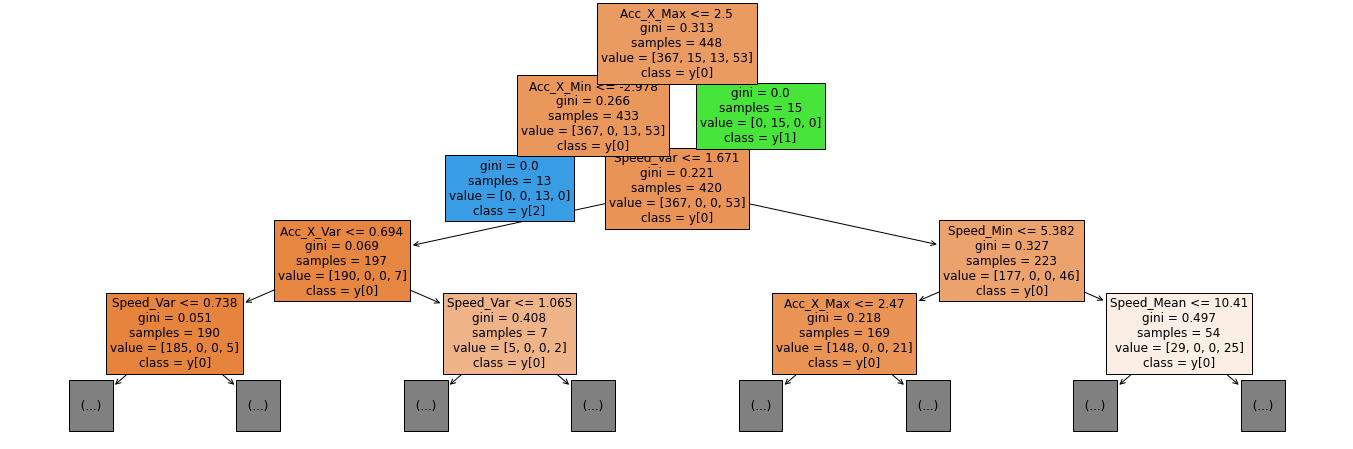

In [1387]:
fig, ax = plt.subplots(figsize=(24, 8))
plot_tree(clf_kmeans.fit(X_train, y_train), feature_names=X_train.columns, max_depth=4, fontsize=12, filled=True, class_names=True)
plt.show()

# DBScan

Teile des Codes zur DBScan Methode stammen von https://towardsdatascience.com/k-means-vs-dbscan-clustering-49f8e627de27

In [1356]:
# import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

dbscan_df = df_windows[['Speed_Max','Speed_Min','Speed_Diff','Speed_Mean','Speed_Var','Acc_X_Min','Acc_X_Max','Acc_X_Diff','Acc_X_Mean','Acc_X_Var',]]

Y = dbscan_df.values
dbclustering = DBSCAN(eps=2.4, min_samples=3)
dbclustering.fit(Y)
labels = dbclustering.labels_
print(labels)

core_samples_mask = np.zeros_like(dbclustering.labels_, dtype=bool)
core_samples_mask[dbclustering.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

s = metrics.silhouette_score(Y, dbclustering.labels_)
print(f'Silhouette Coefficient for the KITTY Vision Dataset Clusters: {s:.2f}')

[-1  0  0  0  0  0  0 -1  0  0 -1  0  1  0  0  0  0  0  0 -1  0  0  0  0
  2  0  0  0 -1  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1 -1 -1  0  0  0  0  0 -1  0 -1 -1  2  0  0  0 -1 -1  0  0
  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  1 -1 -1  0  0  0
  0 -1  0 -1  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1 -1 -1  0 -1  0  2  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0 -1  0 -1  0
 -1  0 -1 -1 -1  0  0  0 -1  0 -1  0  0  0  0 -1  0  0  0  0  0  2  0  0
  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1 -1  3  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0 -1  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

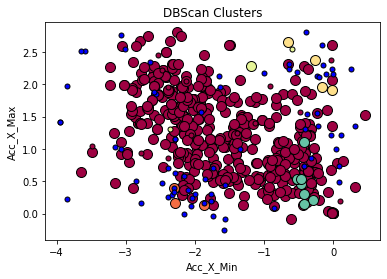

In [1357]:
x = 5 #X-Achse welche dargestellt werden soll
y = 6 #Y-Achse welche dargestellt werden soll

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        #Blue used for noise
        col = 'b'
    
    class_member_mask = (labels == k)
    xy = Y[class_member_mask & core_samples_mask]
    plt.plot(xy[:, x], xy[:, y], 'o', markerfacecolor=col,
    markeredgecolor='k', markersize=10)
    
    xy = Y[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, x], xy[:, y], 'o', markerfacecolor=col,
    markeredgecolor='k', markersize=5)

cname_x = dbscan_df.columns[x]
cname_y = dbscan_df.columns[y]
plt.xlabel(cname_x)
plt.ylabel(cname_y)
plt.savefig('DBScan.png')
plt.title('DBScan Clusters')
plt.show()

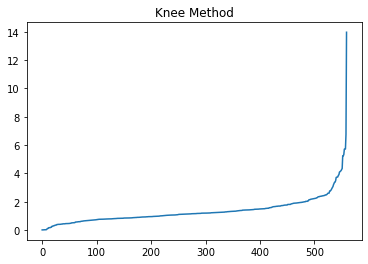

In [1358]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)

nearest_neighbors.fit(Y)
distances, indices = nearest_neighbors.kneighbors(Y)
distances = np.sort(distances, axis=0)[:, 1]
#print(distances)
plt.title('Knee Method')
plt.plot(distances)
plt.show()

### Entscheidungsbaum mit K-Means Clustering

In [1375]:
#from sklearn.model_selection import train_test_split

#dbscan_df = df_windows[['Window_Index','Speed_Max','Speed_Min','Speed_Diff','Speed_Mean','Speed_Var','Acc_X_Min','Acc_X_Max','Acc_X_Diff','Acc_X_Mean','Acc_X_Var']]
#dbscan_df.insert(0,'DBScan',labels)
#dtrain_complete_dbscan = dbscan_df.drop(['Window_Index'],axis=1) # Drop Index
#dtrain_wo_targets_dbscan = dtrain_complete_dbscan.drop(['DBScan'],axis=1)

#X_train_dbscan, X_test_dbscan, y_train_dbscan, y_test_dbscan = train_test_split(dtrain_wo_targets_dbscan,dtrain_complete_dbscan['DBScan'],test_size=0.2)
helper_df = df_windows.drop(['DBScan','K-Means'],axis=1)
dbscan_df = helper_df
dbscan_df.insert(0,'DBScan',labels)
dtrain_complete_dbscan = dbscan_df.drop(['Window_Index'],axis=1) # Drop Index
dtrain_wo_targets_dbscan = dtrain_complete_dbscan.drop(['Hat_Starkes_Bremsen','Hat_Starkes_Beschleunigen','Hat_Scharfe_Rechtskurve','Hat_Scharfe_Linkskurve','Grenzwerte'],axis=1)

In [1376]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf_dbscan = DecisionTreeClassifier(random_state=0,max_depth=4)
clf_dbscan.fit(X_train,y_train)
print(clf_dbscan.score(X_train,y_train))
print(clf_dbscan.score(X_test,y_test))

0.8816964285714286
0.8571428571428571


In [1377]:
# Confusion-Matrix
from sklearn.metrics import classification_report, confusion_matrix
clf_dbscan = DecisionTreeClassifier(random_state=0,max_depth=20)

# Calculate confusion matrix for training set

# Training
clf_dbscan.fit(X_train,y_train)

# Vorhersage auf Trainingsdaten
y_pred_dbscan = clf_dbscan.predict(X_train)
print(confusion_matrix(y_train, y_pred_dbscan))
print(classification_report(y_train, y_pred_dbscan))

# Calculate confusion matrix for test set

# Vorhersage auf Test-Daten
y_pred_dbscan = clf_dbscan.predict(X_test)
print(confusion_matrix(y_test, y_pred_dbscan))
print(classification_report(y_test, y_pred_dbscan))

[[367   0   0   0]
 [  0  15   0   0]
 [  0   0  13   0]
 [  0   0   0  53]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       367
         1.0       1.00      1.00      1.00        15
         2.0       1.00      1.00      1.00        13
         4.0       1.00      1.00      1.00        53

    accuracy                           1.00       448
   macro avg       1.00      1.00      1.00       448
weighted avg       1.00      1.00      1.00       448

[[81  0  2  8]
 [ 0  3  0  0]
 [ 0  0  4  0]
 [ 8  0  0  6]]
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        91
         1.0       1.00      1.00      1.00         3
         2.0       0.67      1.00      0.80         4
         4.0       0.43      0.43      0.43        14

    accuracy                           0.84       112
   macro avg       0.75      0.83      0.78       112
weighted avg       0.84      0.84      0.84    

In [1378]:
from sklearn import tree
print(tree.export_text(clf_dbscan,feature_names=list(X_train.columns[0:10])))

|--- Acc_X_Max <= 2.50
|   |--- Acc_X_Min <= -2.98
|   |   |--- class: 2.0
|   |--- Acc_X_Min >  -2.98
|   |   |--- Speed_Var <= 1.67
|   |   |   |--- Acc_X_Var <= 0.69
|   |   |   |   |--- Speed_Var <= 0.74
|   |   |   |   |   |--- Speed_Min <= 11.03
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Speed_Min >  11.03
|   |   |   |   |   |   |--- Speed_Min <= 11.09
|   |   |   |   |   |   |   |--- Acc_X_Max <= 0.61
|   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |   |--- Acc_X_Max >  0.61
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Speed_Min >  11.09
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Speed_Var >  0.74
|   |   |   |   |   |--- Speed_Var <= 0.75
|   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |--- Speed_Var >  0.75
|   |   |   |   |   |   |--- Acc_X_Var <= 0.08
|   |   |   |   |   |   |   |--- Acc_X_Var <= 0.07
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |  

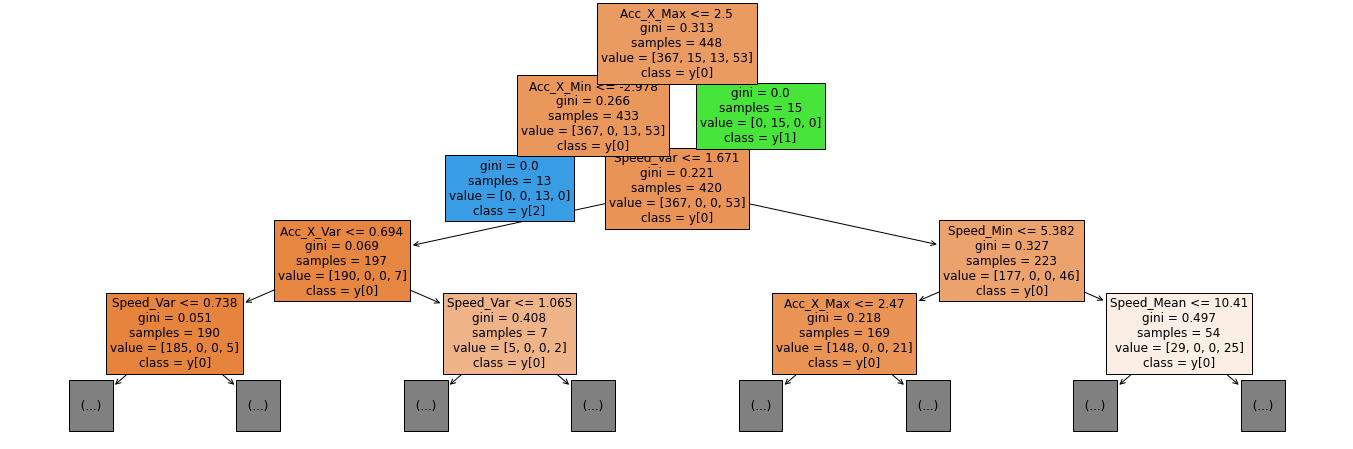

In [1379]:
fig, ax = plt.subplots(figsize=(24, 8))
plot_tree(clf_dbscan.fit(X_train, y_train), feature_names=X_train.columns, max_depth=4, fontsize=12, filled=True, class_names=True)
plt.show()

## Grenzwerte vs. K-Means vs DBScan

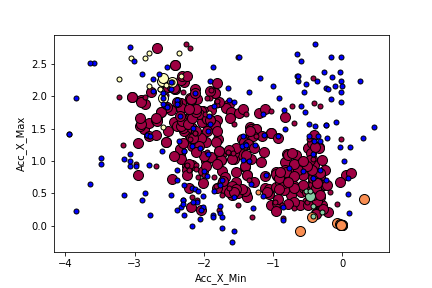

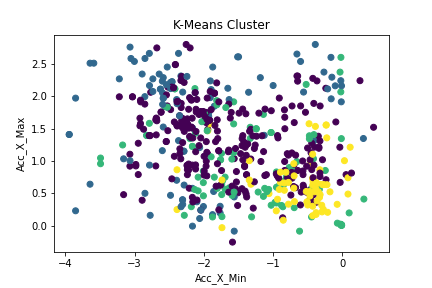

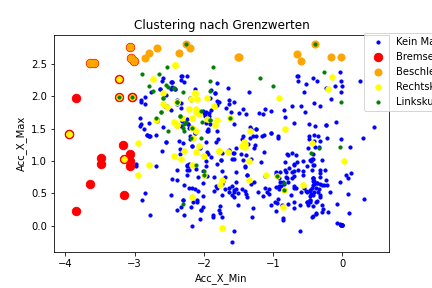

In [1242]:
from IPython.display import Image
from IPython.display import display
d = Image(filename='DBScan.png') 
k = Image(filename='KMeans.png')
g = Image(filename='TestGrenzwert.png')
display(d, k, g)

## Erstellung von Arrays mit dem Window Index für die jeweiligen Manöver

In [348]:
#sanftes bremsen
arr_sanftes_bremsen = np.array([])
count = 0
zahl = 0
for x in range(len(all_windows)):
    stabrem = all_windows[x][['af']]
    stabrem_describe = stabrem.describe()
    bremsen = stabrem_describe.loc['min'] 
    if float(bremsen) > -0.1 and float(bremsen) > -2:
        all_windows[x]['Event_sanftes_bremsen']=1
        count = count +1
        arr_sanftes_bremsen = np.append(arr_sanftes_bremsen, x)
        #print(str(x))
    else:
        all_windows[x]['Event_sanftes_bremsen']=0
        zahl = zahl + 1
print('Anzahl Windows mit einem sanften Bremsmanöver: '+str(count))
print('Anzahl Windows mit keinem sanften Bremsmanöver: '+str(zahl))
print('Gesamtanzahl Windows: '+str(len(all_windows)))

<ipython-input-348-405dae149e44>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_sanftes_bremsen']=0
<ipython-input-348-405dae149e44>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_sanftes_bremsen']=1


Anzahl Windows mit einem sanften Bremsmanöver: 32
Anzahl Windows mit keinem sanften Bremsmanöver: 528
Gesamtanzahl Windows: 560


In [349]:
#normales bremsen
arr_normales_bremsen = np.array([])
count = 0
zahl = 0
for x in range(len(all_windows)):
    stabrem = all_windows[x][['af']]
    stabrem_describe = stabrem.describe()
    bremsen = stabrem_describe.loc['min'] 
    if float(bremsen) > -2 and float(bremsen) > -3:
        all_windows[x]['Event_normales_bremsen']=1
        count = count +1
        arr_normales_bremsen = np.append(arr_normales_bremsen, x)
        #print(str(x))
    else:
        all_windows[x]['Event_normales_bremsen']=0
        zahl = zahl + 1
print('Anzahl Windows mit einem normalen Bremsmanöver: '+str(count))
print('Anzahl Windows mit keinem normalen Bremsmanöver: '+str(zahl))
print('Gesamtanzahl Windows: '+str(len(all_windows)))

<ipython-input-349-99582587cfff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_normales_bremsen']=1
<ipython-input-349-99582587cfff>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_normales_bremsen']=0


Anzahl Windows mit einem normalen Bremsmanöver: 353
Anzahl Windows mit keinem normalen Bremsmanöver: 207
Gesamtanzahl Windows: 560


In [350]:
#starkes bremsen
arr_starkes_bremsen = np.array([])
arr_not_starkes_bremsen = np.array([])
count = 0
zahl = 0
for x in range(len(all_windows)):
    stabrem = all_windows[x][['af']]
    stabrem_describe = stabrem.describe()
    bremsen = stabrem_describe.loc['min'] 
    if float(bremsen) < -3:
        all_windows[x]['Event_starkes_bremsen']=1
        count = count +1
        arr_starkes_bremsen = np.append(arr_starkes_bremsen, x)
        print(str(x))
    else:
        all_windows[x]['Event_starkes_bremsen']=0
        zahl = zahl + 1
        arr_not_starkes_bremsen = np.append(arr_not_starkes_bremsen, x)
print('Anzahl Windows mit einem starken Bremsmanöver: '+str(count))
print('Anzahl Windows mit keinem starken Bremsmanöver: '+str(zahl))
print('Gesamtanzahl Windows: '+str(len(all_windows)))

<ipython-input-350-e60d7e6743bb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_starkes_bremsen']=0
<ipython-input-350-e60d7e6743bb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_starkes_bremsen']=1


Anzahl Windows mit einem starken Bremsmanöver: 22
Anzahl Windows mit keinem starken Bremsmanöver: 538
Gesamtanzahl Windows: 560


In [373]:
#starkes bremsen mit stillstand
arr_starkes_bremsen_stillstand = np.array([])
arr_not_starkes_bremsen_stillstand = np.array([])
count = 0
zahl = 0
for x in range(len(all_windows)):
    stabrem = all_windows[x][['af']]
    stabrem_describe = stabrem.describe()
    bremsen = stabrem_describe.loc['min'] 
    stillbrem = all_windows[x][['vf']]
    stillbrem_describe = stillbrem.describe()
    still = stillbrem_describe.loc['min']
    if float(bremsen) < -3 and float(still) < 0.5:
        all_windows[x]['Event_starkes_stillstand_bremsen']=1
        count = count +1
        arr_starkes_bremsen_stillstand = np.append(arr_starkes_bremsen_stillstand, x)
        #print(str(x))
    else:
        all_windows[x]['Event_starkes_stillstand_bremsen']=0
        zahl = zahl + 1
        arr_not_starkes_bremsen_stillstand = np.append(arr_not_starkes_bremsen_stillstand, x)
print('Anzahl Windows mit einem starken Bremsmanöver und Stillstand: '+str(count))
print('Anzahl Windows mit keinem starken Bremsmanöver und Stillstand: '+str(zahl))
print('Gesamtanzahl Windows: '+str(len(all_windows)))

Anzahl Windows mit einem starken Bremsmanöver und Stillstand: 8
Anzahl Windows mit keinem starken Bremsmanöver und Stillstand: 552
Gesamtanzahl Windows: 560


In [352]:
#sanftes beschleunigen
arr_sanftes_beschleunigen = np.array([])
count = 0
zahl = 0
for x in range(len(all_windows)):
    stabrem = all_windows[x][['af']]
    stabrem_describe = stabrem.describe()
    beschl = stabrem_describe.loc['max'] 
    if float(beschl) > 0.1 and float(beschl) > 1.5:
        all_windows[x]['Event_sanftes_beschleunigen']=1
        count = count +1
        arr_sanftes_beschleunigen = np.append(arr_sanftes_beschleunigen, x)
        #print(str(x))
    else:
        all_windows[x]['Event_sanftes_beschleunigen']=0
        zahl = zahl + 1
print('Anzahl Windows mit einem sanften beschleunigen: '+str(count))
print('Anzahl Windows mit keinem sanften beschleunigen: '+str(zahl))
print('Gesamtanzahl Windows: '+str(len(all_windows)))

<ipython-input-352-b9ebefe40602>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_sanftes_beschleunigen']=0
<ipython-input-352-b9ebefe40602>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_sanftes_beschleunigen']=1


Anzahl Windows mit einem sanften beschleunigen: 200
Anzahl Windows mit keinem sanften beschleunigen: 360
Gesamtanzahl Windows: 560


In [353]:
#normales beschleunigen
arr_normales_beschleunigen = np.array([])
count = 0
zahl = 0
for x in range(len(all_windows)):
    stabrem = all_windows[x][['af']]
    stabrem_describe = stabrem.describe()
    beschl = stabrem_describe.loc['max'] 
    if float(beschl) > 1.5 and float(beschl) < 2.5:
        all_windows[x]['Event_normales_beschleunigen']=1
        count = count +1
        arr_normales_beschleunigen = np.append(arr_normales_beschleunigen, x)
        #print(str(x))
    else:
        all_windows[x]['Event_normales_beschleunigen']=0
        zahl = zahl + 1
print('Anzahl Windows mit einem normalen beschleunigen: '+str(count))
print('Anzahl Windows mit keinem normalen beschleunigen: '+str(zahl))
print('Gesamtanzahl Windows: '+str(len(all_windows)))

<ipython-input-353-39403bd51e3d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_normales_beschleunigen']=0
<ipython-input-353-39403bd51e3d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_normales_beschleunigen']=1


Anzahl Windows mit einem normalen beschleunigen: 182
Anzahl Windows mit keinem normalen beschleunigen: 378
Gesamtanzahl Windows: 560


In [360]:
#starkes beschleunigen
arr_starkes_beschleunigen = np.array([])
arr_not_starkes_beschleunigen = np.array([])
count = 0
zahl = 0
for x in range(len(all_windows)):
    stabrem = all_windows[x][['af']]
    stabrem_describe = stabrem.describe()
    beschl = stabrem_describe.loc['max'] 
    if float(beschl) > 2.5:
        all_windows[x]['Event_starkes_beschhleunigen']=1
        count = count +1
        arr_starkes_beschleunigen = np.append(arr_starkes_beschleunigen, x)
        #print(str(x))
    else:
        all_windows[x]['Event_starkes_beschleunigen']=0
        zahl = zahl + 1
        arr_not_starkes_beschleunigen = np.append(arr_not_starkes_beschleunigen, x)
print('Anzahl Windows mit einem starken beschleunigen: '+str(count))
print('Anzahl Windows mit keinem starken beschleunigen: '+str(zahl))
print('Gesamtanzahl Windows: '+str(len(all_windows)))

Anzahl Windows mit einem starken beschleunigen: 18
Anzahl Windows mit keinem starken beschleunigen: 542
Gesamtanzahl Windows: 560


In [355]:
#rechtskurve
arr_rechtskurve = np.array([])
count = 0
zahl = 0
for x in range(len(all_windows)):
    stabrem = all_windows[x][['al']]
    stabrem_describe = stabrem.describe()
    reku = stabrem_describe.loc['min'] 
    if float(reku) < -1.5:
        #all_windows[x]['Event_rechts']=1
        count = count +1
        arr_rechtskurve = np.append(arr_rechtskurve, x)
        #print(str(x))
    else:
        #all_windows[x]['Event_rechts']=0
        zahl = zahl + 1
print('Anzahl Windows mit einer Rechtskurve: '+str(count))
print('Anzahl Windows mit keiner Rechtskurve: '+str(zahl))
print('Gesamtanzahl Windows: '+str(len(all_windows)))

Anzahl Windows mit einer Rechtskurve: 183
Anzahl Windows mit keiner Rechtskurve: 377
Gesamtanzahl Windows: 560


In [359]:
#scharfe rechtskurve
arr_scharfe_rechtskurve = np.array([])
arr_not_scharfe_rechtskurve = np.array([])
count = 0
zahl = 0
for x in range(len(all_windows)):
    stabrem = all_windows[x][['al']]
    stabrem_describe = stabrem.describe()
    reku = stabrem_describe.loc['min'] 
    if float(reku) < -3:
        all_windows[x]['Event_scharf_rechts']=1
        count = count +1
        arr_scharfe_rechtskurve = np.append(arr_scharfe_rechtskurve, x)
        #print(str(x))
    else:
        all_windows[x]['Event_scharf_rechts']=0
        zahl = zahl + 1
        arr_not_scharfe_rechtskurve = np.append(arr_not_scharfe_rechtskurve, x)
print('Anzahl Windows mit einer scharfen Rechtskurve: '+str(count))
print('Anzahl Windows mit keiner scharfen Rechtskurve: '+str(zahl))
print('Gesamtanzahl Windows: '+str(len(all_windows)))

Anzahl Windows mit einer scharfen Rechtskurve: 73
Anzahl Windows mit keiner scharfen Rechtskurve: 487
Gesamtanzahl Windows: 560


In [357]:
#linkskurve
arr_linkskurve = np.array([])
count = 0
zahl = 0
for x in range(len(all_windows)):
    stabrem = all_windows[x][['al']]
    stabrem_describe = stabrem.describe()
    liku = stabrem_describe.loc['max'] 
    if float(liku) > 1.5:
        all_windows[x]['Event_links']=1
        count = count +1
        arr_linkskurve = np.append(arr_linkskurve, x)
        #print(str(x))
    else:
        all_windows[x]['Event_links']=0
        zahl = zahl + 1
print('Anzahl Windows mit einem starken Bremsmanöver: '+str(count))
print('Anzahl Windows mit keiner Linkskurve: '+str(zahl))
print('Gesamtanzahl Windows: '+str(len(all_windows)))

<ipython-input-357-05dea1db572d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_links']=0
<ipython-input-357-05dea1db572d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_links']=1


Anzahl Windows mit einem starken Bremsmanöver: 163
Anzahl Windows mit keiner Linkskurve: 397
Gesamtanzahl Windows: 560


In [358]:
#scharfe linkskurve
arr_scharfe_linkskurve = np.array([])
arr_not_scharfe_linkskurve = np.array([])
count = 0
zahl = 0
for x in range(len(all_windows)):
    stabrem = all_windows[x][['al']]
    stabrem_describe = stabrem.describe()
    liku = stabrem_describe.loc['max'] 
    if float(liku) > 3:
        all_windows[x]['Event_scharf_links']=1
        count = count +1
        arr_scharfe_linkskurve = np.append(arr_scharfe_linkskurve, x)
        #print(str(x))
    else:
        all_windows[x]['Event_scharf_links']=0
        zahl = zahl + 1
        arr_not_scharfe_linkskurve = np.append(arr_not_scharfe_linkskurve, x)
print('Anzahl Windows mit einer scharfen Linkskurve: '+str(count))
print('Anzahl Windows mit keiner scharfen Linkskurve: '+str(zahl))
print('Gesamtanzahl Windows: '+str(len(all_windows)))

<ipython-input-358-e422369c8693>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_scharf_links']=0
<ipython-input-358-e422369c8693>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_windows[x]['Event_scharf_links']=1


Anzahl Windows mit einer scharfen Linkskurve: 53
Anzahl Windows mit keiner scharfen Linkskurve: 507
Gesamtanzahl Windows: 560


In [584]:
arr_scharfe_linkskurve

array([ 24.,  62.,  64., 274., 275., 277., 282., 285., 293., 294., 300.,
       301., 308., 310., 315., 342., 345., 350., 377., 388., 411., 414.,
       415., 416., 417., 430., 432., 434., 436., 439., 441., 445., 446.,
       448., 461., 463., 465., 466., 469., 472., 473., 474., 477., 482.,
       484., 493., 504., 505., 506., 509., 514., 515., 525.])

24.02083396911621 Sekunden
-0.123039 km/h: Kleinse Geschwindigeit
 42.946805 km/h: Größte Geschwindigeit
-1.874615 m/s^2: Kleinse Beschleunigung
 0.173138 m/s^2: Größte Beschleunigung
!GPS Data nicht immer von rechts nach links lesen!


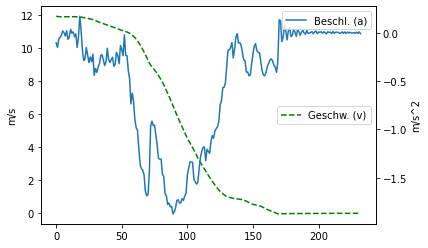

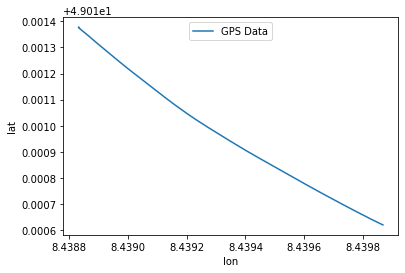

In [1322]:
nummer = 4
dfplot = df[nummer][['Timestamp','vf','af','lat','lon']]
ax = dfplot[['vf']].plot(style='g', linestyle='dashed')
yx = dfplot[['af']].plot(secondary_y=True, ax=ax)
ax.legend(["Geschw. (v)"], loc='center right')
yx.legend(["Beschl. (a)"], loc='upper right')
yx.set_ylabel('m/s^2')
ax.set_ylabel('m/s')
plt.savefig('beispiel.png')

bx = dfplot.plot(4,3)
bx.legend(["GPS Data"], loc='upper center')
bx.set_ylabel('lat')
bx.set_xlabel('lon')

time = dfplot.iloc[len(dfplot)-1].iat[0].timestamp()-dfplot.iloc[0].iat[0].timestamp()
print(str(time) + ' Sekunden')

a = df[nummer][['af']]
awert = a.describe()
kmh = df[nummer][['vf']]*3.6
kmhminmax = kmh.describe()
print(kmhminmax.loc['min'].to_string(header=None, index=None) + ' km/h: Kleinse Geschwindigeit')
print(kmhminmax.loc['max'].to_string(header=None, index=None) + ' km/h: Größte Geschwindigeit')
print(awert.loc['min'].to_string(header=None, index=None) + ' m/s^2: Kleinse Beschleunigung')
print(awert.loc['max'].to_string(header=None, index=None) + ' m/s^2: Größte Beschleunigung')
print('!GPS Data nicht immer von rechts nach links lesen!')

## Dynamic Time Warping

In [486]:
#create Numpy-Array-List for DTW
import numpy as np

window_list_vf = []
for c in range(len(all_windows)):
    arr_vf = np.array([])
    for v in range(len(all_windows[c])):
        arr_vf = np.append(arr_vf, all_windows[c][['vf']].iloc[v])
    window_list_vf.append(arr_vf)
    
window_list_af = []
for b in range(len(all_windows)):
    arr_af = np.array([])
    for a in range(len(all_windows[b])):
        arr_af = np.append(arr_af, all_windows[b][['af']].iloc[a])
    window_list_af.append(arr_af)
    
window_list_al = []
for b in range(len(all_windows)):
    arr_af = np.array([])
    for a in range(len(all_windows[b])):
        arr_af = np.append(arr_af, all_windows[b][['al']].iloc[a])
    window_list_al.append(arr_af)
    
window_list_lat = []
for b in range(len(all_windows)):
    arr_af = np.array([])
    for a in range(len(all_windows[b])):
        arr_af = np.append(arr_af, all_windows[b][['lat']].iloc[a])
    window_list_lat.append(arr_af)
    
window_list_lon = []
for b in range(len(all_windows)):
    arr_af = np.array([])
    for a in range(len(all_windows[b])):
        arr_af = np.append(arr_af, all_windows[b][['lon']].iloc[a])
    window_list_lon.append(arr_af)
    
print('Numpy Arrays für die Windows erstellt')

Numpy Arrays für die Windows erstellt


### Visualisierung

DTW: 30.564868340863267


(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F245827D00>,
       dtype=object))

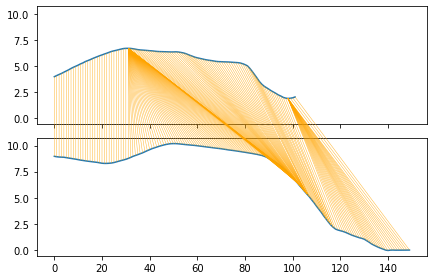

In [484]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np

#starker bremscheck
window1 = 110
window2 = 299
s1 = np.array([])
s2 = np.array([])
for x in range(len(all_windows[window1])):
    s1 = np.append(s1, all_windows[window1][['vf']].iloc[x])
for x in range(len(all_windows[window2])):
    s2 = np.append(s2, all_windows[window2][['vf']].iloc[x])

distance_dtw = dtw.distance(s1, s2)
print('DTW: '+str(distance_dtw))
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)
#dtwvis.plot_warping(s1, s2, path, filename="warp.png")

DTW: 30.564868340863267


(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F247035E50>,
       dtype=object))

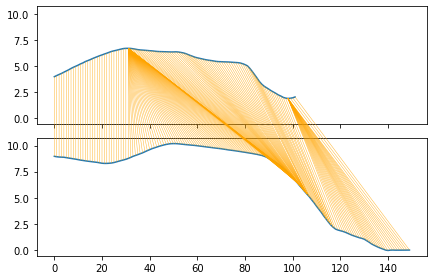

In [485]:
#starker bremscheck
window1 = 110
window2 = 299
s1 = window_list_vf[window1]
s2 = window_list_vf[window2]

distance_dtw = dtw.distance(s1, s2)
print('DTW: '+str(distance_dtw))
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)
#dtwvis.plot_warping(s1, s2, path, filename="warp.png")

## Matrix erstellen

### Matrix - Starkes Bremsen

In [487]:
#Matrix erstellen für starkes bremsen
num_window = len(all_windows)
dtw_matrix_bremsen_vf = pd.DataFrame()
dtw_matrix_bremsen_vf.insert(0,'Windows',arr_starkes_bremsen)
dtw_matrix_bremsen_af = pd.DataFrame()
dtw_matrix_bremsen_af.insert(0,'Windows',arr_starkes_bremsen)
dtw_matrix_bremsen_combined = pd.DataFrame()
dtw_matrix_bremsen_combined.insert(0,'Windows',arr_starkes_bremsen)
num_arr = len(dtw_matrix_bremsen_af)

#Geschwindigkeit - Matrix erstellen
for matrix_counter in range(num_arr):
    arr_helper = np.array([])
    for matrix_counter2 in range(num_arr):
        window1 = int(arr_starkes_bremsen[matrix_counter])
        window2 = int(arr_starkes_bremsen[matrix_counter2])
        w1 = window_list_vf[window1]
        w2 = window_list_vf[window2]
        distance_dtw_vf = dtw.distance(w1, w2)
        arr_helper = np.append(arr_helper, distance_dtw_vf)
    reihe = matrix_counter+1
    spaltenname = str(arr_starkes_bremsen[matrix_counter])
    dtw_matrix_bremsen_vf.insert(reihe,spaltenname,arr_helper)
print('Matrix für Geschwindigkeit erfolgreich erstellt')

#Summe und Quadratsumme für starkes bremsen
arr_summe = ([])
for summe in range(num_arr):
    summe_dtw = 0.0
    for s in range(num_arr):
        summe_dtw = summe_dtw + dtw_matrix_bremsen_vf.iat[s,summe+1]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
for quadrat in range(num_arr):
    quadratsumme_dtw = 0.0
    for qs in range(num_arr):
        quadratsumme_dtw = quadratsumme_dtw + dtw_matrix_bremsen_vf.iat[qs,quadrat+1]**2
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)

dtw_matrix_bremsen_vf.insert(1,'Summe',arr_summe)
dtw_matrix_bremsen_vf.insert(1,'Quadratsumme',arr_quadratsumme)
print('Summe und Quadratsumme erfolgreich hinzugefügt')
print('')

#Zu kombinierten hinzufügen
dtw_matrix_bremsen_combined.insert(1,'Summe_vf',arr_summe)
dtw_matrix_bremsen_combined.insert(1,'Quadratsumme_vf',arr_quadratsumme)

#Beschleunigung - Matrix erstellen
for matrix_counter in range(num_arr):
    arr_helper = np.array([])
    for matrix_counter2 in range(num_arr):
        window1 = int(arr_starkes_bremsen[matrix_counter])
        window2 = int(arr_starkes_bremsen[matrix_counter2])
        w1 = window_list_af[window1]
        w2 = window_list_af[window2]
        distance_dtw_af = dtw.distance(w1, w2)
        arr_helper = np.append(arr_helper, distance_dtw_af)
    reihe = matrix_counter+1
    spaltenname = str(arr_starkes_bremsen[matrix_counter])
    dtw_matrix_bremsen_af.insert(reihe,spaltenname,arr_helper)
print('Matrix für Beschleunigung erfolgreich erstellt')

#Summe und Quadratsumme für starkes bremsen
arr_summe = ([])
for summe in range(num_arr):
    summe_dtw = 0.0
    for s in range(num_arr):
        summe_dtw = summe_dtw + dtw_matrix_bremsen_af.iat[s,summe+1]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
for quadrat in range(num_arr):
    quadratsumme_dtw = 0.0
    for qs in range(num_arr):
        quadratsumme_dtw = quadratsumme_dtw + dtw_matrix_bremsen_af.iat[qs,quadrat+1]**2
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)

dtw_matrix_bremsen_af.insert(1,'Summe',arr_summe)
dtw_matrix_bremsen_af.insert(1,'Quadratsumme',arr_quadratsumme)
print('Summe und Quadratsumme erfolgreich hinzugefügt')
print('')
#Zu kombinierten hinzufügen
dtw_matrix_bremsen_combined.insert(1,'Summe_af',arr_summe)
dtw_matrix_bremsen_combined.insert(1,'Quadratsumme_af',arr_quadratsumme)

#Kombinierte Matrix
arr_summe = ([])
summe_dtw = 0.0
for s in range(num_arr):
    summe_dtw = dtw_matrix_bremsen_combined.iat[s,2] + dtw_matrix_bremsen_combined.iat[s,4]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
quadratsumme_dtw = 0.0
for qs in range(num_arr):
    quadratsumme_dtw = dtw_matrix_bremsen_combined.iat[qs,1] + dtw_matrix_bremsen_combined.iat[qs,3]
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)
    
dtw_matrix_bremsen_combined.insert(1,'Summe_combined',arr_summe)
dtw_matrix_bremsen_combined.insert(1,'Quadratsumme_combined',arr_quadratsumme)
print('Kombinierte Matrix erfoglreich erstellt')
print('Kombinierte Matrix erfolgreich errechnet')

Matrix für Geschwindigkeit erfolgreich erstellt
Summe und Quadratsumme erfolgreich hinzugefügt

Matrix für Beschleunigung erfolgreich erstellt
Summe und Quadratsumme erfolgreich hinzugefügt

Kombinierte Matrix erfoglreich erstellt
Kombinierte Matrix erfolgreich errechnet


In [468]:
dtw_matrix_bremsen_combined

,Windows,Quadratsumme_combined,Summe_combined,Quadratsumme_vf,Summe_vf,Quadratsumme_af,Summe_af
0,110.0,46781.492750,1060.264805,1782.864721,181.873433,44998.628029,878.391372
1,251.0,55420.609683,1124.568026,2128.615371,199.338695,53291.994312,925.229330
2,269.0,44747.371744,1027.272497,3465.077041,253.091964,41282.294704,774.180534
3,270.0,154186.861077,1951.898502,3666.543820,274.066328,150520.317257,1677.832174
4,279.0,67936.145330,1228.263203,1846.095703,185.205474,66090.049627,1043.057729
5,287.0,56719.928550,1122.223633,1843.337353,186.257415,54876.591197,935.966217
6,292.0,48645.042421,1084.333021,3069.820920,239.620706,45575.221501,844.712315
7,295.0,91742.642161,1427.600596,1662.155532,176.098347,90080.486629,1251.502249
8,299.0,46765.259580,1043.947209,1960.693395,189.857847,44804.566185,854.089362
9,302.0,63219.359465,1190.624759,1829.354061,187.390233,61390.005404,1003.234526


## Manöver mit durchschnittlich geringstem DTW-Wert - Starkes Bremsen

In [489]:
#Bestes Manöver-starkes_bremsen zum vergleichen
#Geschwindigkeit
df_matrix = dtw_matrix_bremsen_vf[['Windows','Quadratsumme','Summe']]
vbs = df_matrix[['Summe']].min().to_string(header=None, index=None)
vbq = df_matrix[['Quadratsumme']].min().to_string(header=None, index=None)
vcs = dtw_matrix_bremsen_vf[['Summe']].idxmin()
vcq = dtw_matrix_bremsen_vf[['Quadratsumme']].idxmin()
vds = df_matrix[['Windows']].loc[vcs].to_string(header=None, index=None)
vdq = df_matrix[['Windows']].loc[vcq].to_string(header=None, index=None)
print('Geschwindigkeit:')
print('Window mit kleinster Summe:        '+vds +'; Summe:        '+vbs)
print('Window mit kleinster Quadratsumme: '+vdq +'; Quadratsumme: '+vbq)
print('')
#Beschleunigung
df_matrix = dtw_matrix_bremsen_af[['Windows','Quadratsumme','Summe']]
bs = df_matrix[['Summe']].min().to_string(header=None, index=None)
bq = df_matrix[['Quadratsumme']].min().to_string(header=None, index=None)
cs = dtw_matrix_bremsen_af[['Summe']].idxmin()
cq = dtw_matrix_bremsen_af[['Quadratsumme']].idxmin()
ds = df_matrix[['Windows']].loc[cs].to_string(header=None, index=None)
dq = df_matrix[['Windows']].loc[cq].to_string(header=None, index=None)
print('Beschleunigung:')
print('Window mit kleinster Summe:        '+ds +'; Summe:        '+bs)
print('Window mit kleinster Quadratsumme: '+dq +'; Quadratsumme: '+bq)
print('')

#Kombiniert
df_matrix = dtw_matrix_bremsen_combined[['Windows','Quadratsumme_combined','Summe_combined']]
kbs = df_matrix[['Summe_combined']].min().to_string(header=None, index=None)
kbq = df_matrix[['Quadratsumme_combined']].min().to_string(header=None, index=None)
kcs = dtw_matrix_bremsen_combined[['Summe_combined']].idxmin()
kcq = dtw_matrix_bremsen_combined[['Quadratsumme_combined']].idxmin()
kds = df_matrix[['Windows']].loc[kcs].to_string(header=None, index=None)
kdq = df_matrix[['Windows']].loc[kcq].to_string(header=None, index=None)
print('Kombiniert:')
print('Window mit kleinster Summe:        '+kds +'; Summe:        '+kbs)
print('Window mit kleinster Quadratsumme: '+kdq +'; Quadratsumme: '+kbq)

Geschwindigkeit:
Window mit kleinster Summe:         407.0; Summe:         682.17059
Window mit kleinster Quadratsumme:  407.0; Quadratsumme:  27200.885375

Beschleunigung:
Window mit kleinster Summe:         295.0; Summe:         176.098347
Window mit kleinster Quadratsumme:  295.0; Quadratsumme:  1662.155532

Kombiniert:
Window mit kleinster Summe:         462.0; Summe:         942.313159
Window mit kleinster Quadratsumme:  462.0; Quadratsumme:  30262.896069


## Vergleich der Manövererkennung - Starkes Bremsen

In [490]:
#Geschwindigkeit vergleichen

summe_gleiche_manöver = 0
summe_andere_manöver = 0
manöver_vergleich = 462 #bestes Window mit den kürzesten DTW-Werten

#Abstand zu allen Starken Bremsen - Manöver
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver (ist nicht relevant aber interessant)
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_vf = summe_andere_manöver/len(arr_not_starkes_bremsen)
gleiche_manöver_vf = summe_gleiche_manöver/len(arr_starkes_bremsen)
print('Auswertung für Starkes Bremsen:')
print('Geschwindigkeit:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_vf))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_vf))

count_richtig = 0
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_vf:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_vf:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_bremsen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Beschleunigung vergleichen
summe_gleiche_manöver = 0
summe_andere_manöver = 0

#Abstand zu allen Starken Bremsen - Manöver
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_af = summe_andere_manöver/len(arr_not_starkes_bremsen)
gleiche_manöver_af = summe_gleiche_manöver/len(arr_starkes_bremsen)
print('Beschleunigung:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_af))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_af))

count_richtig = 0
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_af:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_af:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_bremsen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Kombiniert

gleiche_manöver_combined = gleiche_manöver_vf +gleiche_manöver_af

count_richtig = 0
count_richtig_or = 0
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined < gleiche_manöver_combined:
        count_richtig = count_richtig +1
    if distance_dtw_af < gleiche_manöver_af or distance_dtw_vf < gleiche_manöver_vf:
        count_richtig_or = count_richtig_or +1

count_falsch = 0
count_falsch_or = 0
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined > gleiche_manöver_combined:
        count_falsch = count_falsch +1
    if distance_dtw_af > gleiche_manöver_af or distance_dtw_vf > gleiche_manöver_vf:
        count_falsch_or = count_falsch_or +1

#Auswertung kombiniert mit Summe der beiden DTW-Werte
insgesamt = count_falsch + count_richtig
prozent_erkannt = (insgesamt/len(all_windows))*100
prozent_richtig = (count_richtig/len(arr_starkes_bremsen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen))*100
print('Kombiniert (Summe DTW-Werte): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet:: '+str(prozent_erkannt)+'%')
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Auswertung kombiniert mit oder Abfrage
insgesamt_or = count_falsch_or + count_richtig_or
prozent_erkannt_or = (insgesamt_or/len(all_windows))*100
prozent_richtig_or = (count_richtig_or/len(arr_starkes_bremsen))*100
prozent_falsch_or = (count_falsch_or/len(arr_not_starkes_bremsen))*100
print('Kombiniert (Geschwindigkeit oder Beschleunigung): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt_or)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet: '+str(prozent_erkannt_or)+'%')
print('Richtig erkannt: ' + str(count_richtig_or)+ ' von ' + str(len(arr_starkes_bremsen)))
print('Trefferquote Richtige: '+str(prozent_richtig_or)+'%')
print('Falsch erkannt: ' + str(count_falsch_or)+ ' von ' + str(len(arr_not_starkes_bremsen)))
print('Trefferquote Falsche: '+str(prozent_falsch_or)+'%')
print('')

Auswertung für Starkes Bremsen:
Geschwindigkeit:
Gleiche Manöver - Durchschnitt DTW: 32.24180869614965
Andere Manöver - Durchschnitt DTW: 45.668491441981914
Richtig erkannt: 13 von 22
Trefferquote Richtige: 59.09090909090909%
Falsch erkannt: 280 von 538
Trefferquote Falsche: 52.04460966542751%

Beschleunigung:
Gleiche Manöver - Durchschnitt DTW: 10.590607643041885
Andere Manöver - Durchschnitt DTW: 11.728800337916699
Richtig erkannt: 9 von 22
Trefferquote Richtige: 40.909090909090914%
Falsch erkannt: 351 von 538
Trefferquote Falsche: 65.24163568773234%

Kombiniert (Summe DTW-Werte): 
Richtig zugeordnet gesamt: 308 von 560
Trefferquote richtig zugeordnet:: 55.00000000000001%
Richtig erkannt: 11 von 22
Trefferquote Richtige: 50.0%
Falsch erkannt: 297 von 538
Trefferquote Falsche: 55.20446096654275%

Kombiniert (Geschwindigkeit oder Beschleunigung): 
Richtig zugeordnet gesamt: 429 von 560
Trefferquote richtig zugeordnet: 76.60714285714286%
Richtig erkannt: 15 von 22
Trefferquote Richtige:

In [501]:
#Geschwindigkeit vergleichen

summe_gleiche_manöver = 0
summe_andere_manöver = 0
manöver_vergleich = 407 #bestes Window mit den kürzesten DTW-Werten

#Abstand zu allen Starken Bremsen - Manöver
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_vf = summe_andere_manöver/len(arr_not_starkes_bremsen)
gleiche_manöver_vf = summe_gleiche_manöver/len(arr_starkes_bremsen)
print('Auswertung für Starkes Bremsen:')
print('Geschwindigkeit:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_vf))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_vf))

count_richtig = 0
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_vf:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_vf:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_bremsen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Beschleunigung vergleichen
summe_gleiche_manöver = 0
summe_andere_manöver = 0

#Abstand zu allen Starken Bremsen - Manöver
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_af = summe_andere_manöver/len(arr_not_starkes_bremsen)
gleiche_manöver_af = summe_gleiche_manöver/len(arr_starkes_bremsen)
print('Beschleunigung:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_af))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_af))

count_richtig = 0
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_af:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_af:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_bremsen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Kombiniert

gleiche_manöver_combined = gleiche_manöver_vf +gleiche_manöver_af

count_richtig = 0
count_richtig_or = 0
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined < gleiche_manöver_combined:
        count_richtig = count_richtig +1
    if distance_dtw_af < gleiche_manöver_af or distance_dtw_vf < gleiche_manöver_vf:
        count_richtig_or = count_richtig_or +1

count_falsch = 0
count_falsch_or = 0
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined > gleiche_manöver_combined:
        count_falsch = count_falsch +1
    if distance_dtw_af > gleiche_manöver_af or distance_dtw_vf > gleiche_manöver_vf:
        count_falsch_or = count_falsch_or +1

#Auswertung kombiniert mit Summe der beiden DTW-Werte
insgesamt = count_falsch + count_richtig
prozent_erkannt = (insgesamt/len(all_windows))*100
prozent_richtig = (count_richtig/len(arr_starkes_bremsen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen))*100
print('Kombiniert (Summe DTW-Werte): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet:: '+str(prozent_erkannt)+'%')
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Auswertung kombiniert mit oder Abfrage
insgesamt_or = count_falsch_or + count_richtig_or
prozent_erkannt_or = (insgesamt_or/len(all_windows))*100
prozent_richtig_or = (count_richtig_or/len(arr_starkes_bremsen))*100
prozent_falsch_or = (count_falsch_or/len(arr_not_starkes_bremsen))*100
print('Kombiniert (Geschwindigkeit oder Beschleunigung): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt_or)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet: '+str(prozent_erkannt_or)+'%')
print('Richtig erkannt: ' + str(count_richtig_or)+ ' von ' + str(len(arr_starkes_bremsen)))
print('Trefferquote Richtige: '+str(prozent_richtig_or)+'%')
print('Falsch erkannt: ' + str(count_falsch_or)+ ' von ' + str(len(arr_not_starkes_bremsen)))
print('Trefferquote Falsche: '+str(prozent_falsch_or)+'%')
print('')

Auswertung für Starkes Bremsen:
Geschwindigkeit:
Gleiche Manöver - Durchschnitt DTW: 31.00775407626546
Andere Manöver - Durchschnitt DTW: 50.061738030141946
Richtig erkannt: 13 von 22
Trefferquote Richtige: 59.09090909090909%
Falsch erkannt: 385 von 538
Trefferquote Falsche: 71.56133828996283%

Beschleunigung:
Gleiche Manöver - Durchschnitt DTW: 12.806822364413158
Andere Manöver - Durchschnitt DTW: 15.670186370783552
Richtig erkannt: 7 von 22
Trefferquote Richtige: 31.818181818181817%
Falsch erkannt: 426 von 538
Trefferquote Falsche: 79.182156133829%

Kombiniert (Summe DTW-Werte): 
Richtig zugeordnet gesamt: 424 von 560
Trefferquote richtig zugeordnet:: 75.71428571428571%
Richtig erkannt: 14 von 22
Trefferquote Richtige: 63.63636363636363%
Falsch erkannt: 410 von 538
Trefferquote Falsche: 76.2081784386617%

Kombiniert (Geschwindigkeit oder Beschleunigung): 
Richtig zugeordnet gesamt: 497 von 560
Trefferquote richtig zugeordnet: 88.75%
Richtig erkannt: 15 von 22
Trefferquote Richtige: 6

In [502]:
#Geschwindigkeit vergleichen

summe_gleiche_manöver = 0
summe_andere_manöver = 0
manöver_vergleich = 295 #bestes Window mit den kürzesten DTW-Werten

#Abstand zu allen Starken Bremsen - Manöver
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_vf = summe_andere_manöver/len(arr_not_starkes_bremsen)
gleiche_manöver_vf = summe_gleiche_manöver/len(arr_starkes_bremsen)
print('Auswertung für Starkes Bremsen:')
print('Geschwindigkeit:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_vf))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_vf))

count_richtig = 0
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_vf:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_vf:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_bremsen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Beschleunigung vergleichen
summe_gleiche_manöver = 0
summe_andere_manöver = 0

#Abstand zu allen Starken Bremsen - Manöver
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_af = summe_andere_manöver/len(arr_not_starkes_bremsen)
gleiche_manöver_af = summe_gleiche_manöver/len(arr_starkes_bremsen)
print('Beschleunigung:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_af))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_af))

count_richtig = 0
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_af:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_af:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_bremsen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Kombiniert

gleiche_manöver_combined = gleiche_manöver_vf +gleiche_manöver_af

count_richtig = 0
count_richtig_or = 0
for counter in range(len(arr_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined < gleiche_manöver_combined:
        count_richtig = count_richtig +1
    if distance_dtw_af < gleiche_manöver_af or distance_dtw_vf < gleiche_manöver_vf:
        count_richtig_or = count_richtig_or +1

count_falsch = 0
count_falsch_or = 0
for counter in range(len(arr_not_starkes_bremsen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined > gleiche_manöver_combined:
        count_falsch = count_falsch +1
    if distance_dtw_af > gleiche_manöver_af or distance_dtw_vf > gleiche_manöver_vf:
        count_falsch_or = count_falsch_or +1

#Auswertung kombiniert mit Summe der beiden DTW-Werte
insgesamt = count_falsch + count_richtig
prozent_erkannt = (insgesamt/len(all_windows))*100
prozent_richtig = (count_richtig/len(arr_starkes_bremsen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen))*100
print('Kombiniert (Summe DTW-Werte): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet:: '+str(prozent_erkannt)+'%')
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Auswertung kombiniert mit oder Abfrage
insgesamt_or = count_falsch_or + count_richtig_or
prozent_erkannt_or = (insgesamt_or/len(all_windows))*100
prozent_richtig_or = (count_richtig_or/len(arr_starkes_bremsen))*100
prozent_falsch_or = (count_falsch_or/len(arr_not_starkes_bremsen))*100
print('Kombiniert (Geschwindigkeit oder Beschleunigung): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt_or)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet: '+str(prozent_erkannt_or)+'%')
print('Richtig erkannt: ' + str(count_richtig_or)+ ' von ' + str(len(arr_starkes_bremsen)))
print('Trefferquote Richtige: '+str(prozent_richtig_or)+'%')
print('Falsch erkannt: ' + str(count_falsch_or)+ ' von ' + str(len(arr_not_starkes_bremsen)))
print('Trefferquote Falsche: '+str(prozent_falsch_or)+'%')
print('')

Auswertung für Starkes Bremsen:
Geschwindigkeit:
Gleiche Manöver - Durchschnitt DTW: 56.88646588412817
Andere Manöver - Durchschnitt DTW: 70.47676980855056
Richtig erkannt: 13 von 22
Trefferquote Richtige: 59.09090909090909%
Falsch erkannt: 315 von 538
Trefferquote Falsche: 58.550185873605955%

Beschleunigung:
Gleiche Manöver - Durchschnitt DTW: 8.004470311896368
Andere Manöver - Durchschnitt DTW: 8.467849537606517
Richtig erkannt: 12 von 22
Trefferquote Richtige: 54.54545454545454%
Falsch erkannt: 334 von 538
Trefferquote Falsche: 62.0817843866171%

Kombiniert (Summe DTW-Werte): 
Richtig zugeordnet gesamt: 326 von 560
Trefferquote richtig zugeordnet:: 58.214285714285715%
Richtig erkannt: 11 von 22
Trefferquote Richtige: 50.0%
Falsch erkannt: 315 von 538
Trefferquote Falsche: 58.550185873605955%

Kombiniert (Geschwindigkeit oder Beschleunigung): 
Richtig zugeordnet gesamt: 462 von 560
Trefferquote richtig zugeordnet: 82.5%
Richtig erkannt: 17 von 22
Trefferquote Richtige: 77.2727272727

### Matrix - Starkes Bremsen mit Stillstand

In [491]:
#Matrix erstellen für starkes bremsen
num_window = len(all_windows)
dtw_matrix_bremsen_still_vf = pd.DataFrame()
dtw_matrix_bremsen_still_vf.insert(0,'Windows',arr_starkes_bremsen_stillstand)
dtw_matrix_bremsen_still_af = pd.DataFrame()
dtw_matrix_bremsen_still_af.insert(0,'Windows',arr_starkes_bremsen_stillstand)
dtw_matrix_bremsen_still_combined = pd.DataFrame()
dtw_matrix_bremsen_still_combined.insert(0,'Windows',arr_starkes_bremsen_stillstand)
num_arr = len(dtw_matrix_bremsen_still_af)

#Geschwindigkeit - Matrix erstellen
for matrix_counter in range(num_arr):
    arr_helper = np.array([])
    for matrix_counter2 in range(num_arr):
        window1 = int(arr_starkes_bremsen_stillstand[matrix_counter])
        window2 = int(arr_starkes_bremsen_stillstand[matrix_counter2])
        w1 = window_list_vf[window1]
        w2 = window_list_vf[window2]
        distance_dtw_vf = dtw.distance(w1, w2)
        arr_helper = np.append(arr_helper, distance_dtw_vf)
    reihe = matrix_counter+1
    spaltenname = str(arr_starkes_bremsen_stillstand[matrix_counter])
    dtw_matrix_bremsen_still_vf.insert(reihe,spaltenname,arr_helper)
print('Matrix für Geschwindigkeit erfolgreich erstellt')

#Summe und Quadratsumme für starkes bremsen mit Stillstand
arr_summe = ([])
for summe in range(num_arr):
    summe_dtw = 0.0
    for s in range(num_arr):
        summe_dtw = summe_dtw + dtw_matrix_bremsen_still_vf.iat[s,summe+1]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
for quadrat in range(num_arr):
    quadratsumme_dtw = 0.0
    for qs in range(num_arr):
        quadratsumme_dtw = quadratsumme_dtw + dtw_matrix_bremsen_still_vf.iat[qs,quadrat+1]**2
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)

dtw_matrix_bremsen_still_vf.insert(1,'Summe',arr_summe)
dtw_matrix_bremsen_still_vf.insert(1,'Quadratsumme',arr_quadratsumme)
print('Summe und Quadratsumme erfolgreich hinzugefügt')
print('')

#Zu kombinierten hinzufügen
dtw_matrix_bremsen_still_combined.insert(1,'Summe_vf',arr_summe)
dtw_matrix_bremsen_still_combined.insert(1,'Quadratsumme_vf',arr_quadratsumme)

#Beschleunigung - Matrix erstellen
for matrix_counter in range(num_arr):
    arr_helper = np.array([])
    for matrix_counter2 in range(num_arr):
        window1 = int(arr_starkes_bremsen_stillstand[matrix_counter])
        window2 = int(arr_starkes_bremsen_stillstand[matrix_counter2])
        w1 = window_list_af[window1]
        w2 = window_list_af[window2]
        distance_dtw_af = dtw.distance(w1, w2)
        arr_helper = np.append(arr_helper, distance_dtw_af)
    reihe = matrix_counter+1
    spaltenname = str(arr_starkes_bremsen_stillstand[matrix_counter])
    dtw_matrix_bremsen_still_af.insert(reihe,spaltenname,arr_helper)
print('Matrix für Beschleunigung erfolgreich erstellt')

#Summe und Quadratsumme für starkes bremsen mit Stillstand
arr_summe = ([])
for summe in range(num_arr):
    summe_dtw = 0.0
    for s in range(num_arr):
        summe_dtw = summe_dtw + dtw_matrix_bremsen_still_af.iat[s,summe+1]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
for quadrat in range(num_arr):
    quadratsumme_dtw = 0.0
    for qs in range(num_arr):
        quadratsumme_dtw = quadratsumme_dtw + dtw_matrix_bremsen_still_af.iat[qs,quadrat+1]**2
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)

dtw_matrix_bremsen_still_af.insert(1,'Summe',arr_summe)
dtw_matrix_bremsen_still_af.insert(1,'Quadratsumme',arr_quadratsumme)
print('Summe und Quadratsumme erfolgreich hinzugefügt')
print('')
#Zu kombinierten hinzufügen
dtw_matrix_bremsen_still_combined.insert(1,'Summe_af',arr_summe)
dtw_matrix_bremsen_still_combined.insert(1,'Quadratsumme_af',arr_quadratsumme)

#Kombinierte Matrix
arr_summe = ([])
summe_dtw = 0.0
for s in range(num_arr):
    summe_dtw = dtw_matrix_bremsen_still_combined.iat[s,2] + dtw_matrix_bremsen_still_combined.iat[s,4]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
quadratsumme_dtw = 0.0
for qs in range(num_arr):
    quadratsumme_dtw = dtw_matrix_bremsen_still_combined.iat[qs,1] + dtw_matrix_bremsen_still_combined.iat[qs,3]
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)
    
dtw_matrix_bremsen_still_combined.insert(1,'Summe_combined',arr_summe)
dtw_matrix_bremsen_still_combined.insert(1,'Quadratsumme_combined',arr_quadratsumme)
print('Kombinierte Matrix erfoglreich erstellt')
print('Kombinierte Matrix erfolgreich errechnet')

Matrix für Geschwindigkeit erfolgreich erstellt
Summe und Quadratsumme erfolgreich hinzugefügt

Matrix für Beschleunigung erfolgreich erstellt
Summe und Quadratsumme erfolgreich hinzugefügt

Kombinierte Matrix erfoglreich erstellt
Kombinierte Matrix erfolgreich errechnet


In [ ]:
dtw_matrix_bremsen_still_combined

In [492]:
#Bestes Manöver-starkes_bremsen zum vergleichen
#Geschwindigkeit
df_matrix = dtw_matrix_bremsen_still_vf[['Windows','Quadratsumme','Summe']]
vbs = df_matrix[['Summe']].min().to_string(header=None, index=None)
vbq = df_matrix[['Quadratsumme']].min().to_string(header=None, index=None)
vcs = dtw_matrix_bremsen_still_vf[['Summe']].idxmin()
vcq = dtw_matrix_bremsen_still_vf[['Quadratsumme']].idxmin()
vds = df_matrix[['Windows']].loc[vcs].to_string(header=None, index=None)
vdq = df_matrix[['Windows']].loc[vcq].to_string(header=None, index=None)
print('Geschwindigkeit:')
print('Window mit kleinster Summe:        '+vds +'; Summe:        '+vbs)
print('Window mit kleinster Quadratsumme: '+vdq +'; Quadratsumme: '+vbq)
print('')
#Beschleunigung
df_matrix = dtw_matrix_bremsen_still_af[['Windows','Quadratsumme','Summe']]
bs = df_matrix[['Summe']].min().to_string(header=None, index=None)
bq = df_matrix[['Quadratsumme']].min().to_string(header=None, index=None)
cs = dtw_matrix_bremsen_still_af[['Summe']].idxmin()
cq = dtw_matrix_bremsen_still_af[['Quadratsumme']].idxmin()
ds = df_matrix[['Windows']].loc[cs].to_string(header=None, index=None)
dq = df_matrix[['Windows']].loc[cq].to_string(header=None, index=None)
print('Beschleunigung:')
print('Window mit kleinster Summe:        '+ds +'; Summe:        '+bs)
print('Window mit kleinster Quadratsumme: '+dq +'; Quadratsumme: '+bq)
print('')

#Kombiniert
df_matrix = dtw_matrix_bremsen_still_combined[['Windows','Quadratsumme_combined','Summe_combined']]
kbs = df_matrix[['Summe_combined']].min().to_string(header=None, index=None)
kbq = df_matrix[['Quadratsumme_combined']].min().to_string(header=None, index=None)
kcs = dtw_matrix_bremsen_still_combined[['Summe_combined']].idxmin()
kcq = dtw_matrix_bremsen_still_combined[['Quadratsumme_combined']].idxmin()
kds = df_matrix[['Windows']].loc[kcs].to_string(header=None, index=None)
kdq = df_matrix[['Windows']].loc[kcq].to_string(header=None, index=None)
print('Kombiniert:')
print('Window mit kleinster Summe:        '+kds +'; Summe:        '+kbs)
print('Window mit kleinster Quadratsumme: '+kdq +'; Quadratsumme: '+kbq)

Geschwindigkeit:
Window mit kleinster Summe:         292.0; Summe:         189.994075
Window mit kleinster Quadratsumme:  292.0; Quadratsumme:  7641.349197

Beschleunigung:
Window mit kleinster Summe:         251.0; Summe:         55.020787
Window mit kleinster Quadratsumme:  251.0; Quadratsumme:  531.823427

Kombiniert:
Window mit kleinster Summe:         292.0; Summe:         257.283188
Window mit kleinster Quadratsumme:  292.0; Quadratsumme:  8349.897484


In [493]:
#Geschwindigkeit vergleichen

summe_gleiche_manöver = 0
summe_andere_manöver = 0
manöver_vergleich = 292 #bestes Window mit den kürzesten DTW-Werten

#Abstand zu allen Starken Bremsen mit Stillstand - Manöver
for counter in range(len(arr_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen_stillstand[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen_stillstand[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_vf = summe_andere_manöver/len(arr_not_starkes_bremsen_stillstand)
gleiche_manöver_vf = summe_gleiche_manöver/len(arr_starkes_bremsen_stillstand)
print('Auswertung für Starkes Bremsen mit Stillstand:')
print('Geschwindigkeit:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_vf))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_vf))

count_richtig = 0
for counter in range(len(arr_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen_stillstand[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_vf:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen_stillstand[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_vf:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_bremsen_stillstand))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen_stillstand))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen_stillstand)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen_stillstand)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Beschleunigung vergleichen
summe_gleiche_manöver = 0
summe_andere_manöver = 0

#Abstand zu allen Starken Bremsen mit Stillstand - Manöver
for counter in range(len(arr_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen_stillstand[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen_stillstand[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_af = summe_andere_manöver/len(arr_not_starkes_bremsen_stillstand)
gleiche_manöver_af = summe_gleiche_manöver/len(arr_starkes_bremsen_stillstand)
print('Beschleunigung:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_af))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_af))

count_richtig = 0
for counter in range(len(arr_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen_stillstand[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_af:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen_stillstand[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_af:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_bremsen_stillstand))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen_stillstand))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen_stillstand)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen_stillstand)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Kombiniert

gleiche_manöver_combined = gleiche_manöver_vf +gleiche_manöver_af

count_richtig = 0
count_richtig_or = 0
for counter in range(len(arr_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen_stillstand[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined < gleiche_manöver_combined:
        count_richtig = count_richtig +1
    if distance_dtw_af < gleiche_manöver_af or distance_dtw_vf < gleiche_manöver_vf:
        count_richtig_or = count_richtig_or +1

count_falsch = 0
count_falsch_or = 0
for counter in range(len(arr_not_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen_stillstand[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined > gleiche_manöver_combined:
        count_falsch = count_falsch +1
    if distance_dtw_af > gleiche_manöver_af or distance_dtw_vf > gleiche_manöver_vf:
        count_falsch_or = count_falsch_or +1

#Auswertung kombiniert mit Summe der beiden DTW-Werte
insgesamt = count_falsch + count_richtig
prozent_erkannt = (insgesamt/len(all_windows))*100
prozent_richtig = (count_richtig/len(arr_starkes_bremsen_stillstand))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen_stillstand))*100
print('Kombiniert (Summe DTW-Werte): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet:: '+str(prozent_erkannt)+'%')
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen_stillstand)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen_stillstand)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Auswertung kombiniert mit oder Abfrage
insgesamt_or = count_falsch_or + count_richtig_or
prozent_erkannt_or = (insgesamt_or/len(all_windows))*100
prozent_richtig_or = (count_richtig_or/len(arr_starkes_bremsen_stillstand))*100
prozent_falsch_or = (count_falsch_or/len(arr_not_starkes_bremsen_stillstand))*100
print('Kombiniert (Geschwindigkeit oder Beschleunigung): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt_or)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet: '+str(prozent_erkannt_or)+'%')
print('Richtig erkannt: ' + str(count_richtig_or)+ ' von ' + str(len(arr_starkes_bremsen_stillstand)))
print('Trefferquote Richtige: '+str(prozent_richtig_or)+'%')
print('Falsch erkannt: ' + str(count_falsch_or)+ ' von ' + str(len(arr_not_starkes_bremsen_stillstand)))
print('Trefferquote Falsche: '+str(prozent_falsch_or)+'%')
print('')

Auswertung für Starkes Bremsen mit Stillstand:
Geschwindigkeit:
Gleiche Manöver - Durchschnitt DTW: 23.74925932514417
Andere Manöver - Durchschnitt DTW: 72.85192672092198
Richtig erkannt: 5 von 8
Trefferquote Richtige: 62.5%
Falsch erkannt: 508 von 552
Trefferquote Falsche: 92.02898550724638%

Beschleunigung:
Gleiche Manöver - Durchschnitt DTW: 8.411139148716062
Andere Manöver - Durchschnitt DTW: 12.021534072297076
Richtig erkannt: 3 von 8
Trefferquote Richtige: 37.5%
Falsch erkannt: 458 von 552
Trefferquote Falsche: 82.97101449275362%

Kombiniert (Summe DTW-Werte): 
Richtig zugeordnet gesamt: 517 von 560
Trefferquote richtig zugeordnet:: 92.32142857142858%
Richtig erkannt: 5 von 8
Trefferquote Richtige: 62.5%
Falsch erkannt: 512 von 552
Trefferquote Falsche: 92.7536231884058%

Kombiniert (Geschwindigkeit oder Beschleunigung): 
Richtig zugeordnet gesamt: 535 von 560
Trefferquote richtig zugeordnet: 95.53571428571429%
Richtig erkannt: 5 von 8
Trefferquote Richtige: 62.5%
Falsch erkannt:

In [503]:
#Geschwindigkeit vergleichen

summe_gleiche_manöver = 0
summe_andere_manöver = 0
manöver_vergleich = 251 #bestes Window mit den kürzesten DTW-Werten

#Abstand zu allen Starken Bremsen mit Stillstand - Manöver
for counter in range(len(arr_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen_stillstand[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen_stillstand[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_vf = summe_andere_manöver/len(arr_not_starkes_bremsen_stillstand)
gleiche_manöver_vf = summe_gleiche_manöver/len(arr_starkes_bremsen_stillstand)
print('Auswertung für Starkes Bremsen mit Stillstand:')
print('Geschwindigkeit:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_vf))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_vf))

count_richtig = 0
for counter in range(len(arr_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen_stillstand[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_vf:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen_stillstand[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_vf:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_bremsen_stillstand))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen_stillstand))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen_stillstand)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen_stillstand)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Beschleunigung vergleichen
summe_gleiche_manöver = 0
summe_andere_manöver = 0

#Abstand zu allen Starken Bremsen mit Stillstand - Manöver
for counter in range(len(arr_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen_stillstand[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen_stillstand[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_af = summe_andere_manöver/len(arr_not_starkes_bremsen_stillstand)
gleiche_manöver_af = summe_gleiche_manöver/len(arr_starkes_bremsen_stillstand)
print('Beschleunigung:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_af))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_af))

count_richtig = 0
for counter in range(len(arr_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen_stillstand[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_af:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen_stillstand[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_af:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_bremsen_stillstand))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen_stillstand))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen_stillstand)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen_stillstand)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Kombiniert

gleiche_manöver_combined = gleiche_manöver_vf +gleiche_manöver_af

count_richtig = 0
count_richtig_or = 0
for counter in range(len(arr_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_bremsen_stillstand[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined < gleiche_manöver_combined:
        count_richtig = count_richtig +1
    if distance_dtw_af < gleiche_manöver_af or distance_dtw_vf < gleiche_manöver_vf:
        count_richtig_or = count_richtig_or +1

count_falsch = 0
count_falsch_or = 0
for counter in range(len(arr_not_starkes_bremsen_stillstand)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_bremsen_stillstand[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined > gleiche_manöver_combined:
        count_falsch = count_falsch +1
    if distance_dtw_af > gleiche_manöver_af or distance_dtw_vf > gleiche_manöver_vf:
        count_falsch_or = count_falsch_or +1

#Auswertung kombiniert mit Summe der beiden DTW-Werte
insgesamt = count_falsch + count_richtig
prozent_erkannt = (insgesamt/len(all_windows))*100
prozent_richtig = (count_richtig/len(arr_starkes_bremsen_stillstand))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_bremsen_stillstand))*100
print('Kombiniert (Summe DTW-Werte): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet:: '+str(prozent_erkannt)+'%')
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_bremsen_stillstand)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_bremsen_stillstand)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Auswertung kombiniert mit oder Abfrage
insgesamt_or = count_falsch_or + count_richtig_or
prozent_erkannt_or = (insgesamt_or/len(all_windows))*100
prozent_richtig_or = (count_richtig_or/len(arr_starkes_bremsen_stillstand))*100
prozent_falsch_or = (count_falsch_or/len(arr_not_starkes_bremsen_stillstand))*100
print('Kombiniert (Geschwindigkeit oder Beschleunigung): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt_or)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet: '+str(prozent_erkannt_or)+'%')
print('Richtig erkannt: ' + str(count_richtig_or)+ ' von ' + str(len(arr_starkes_bremsen_stillstand)))
print('Trefferquote Richtige: '+str(prozent_richtig_or)+'%')
print('Falsch erkannt: ' + str(count_falsch_or)+ ' von ' + str(len(arr_not_starkes_bremsen_stillstand)))
print('Trefferquote Falsche: '+str(prozent_falsch_or)+'%')
print('')

Auswertung für Starkes Bremsen mit Stillstand:
Geschwindigkeit:
Gleiche Manöver - Durchschnitt DTW: 32.34944725318762
Andere Manöver - Durchschnitt DTW: 76.86414787573696
Richtig erkannt: 4 von 8
Trefferquote Richtige: 50.0%
Falsch erkannt: 492 von 552
Trefferquote Falsche: 89.13043478260869%

Beschleunigung:
Gleiche Manöver - Durchschnitt DTW: 6.877598374716843
Andere Manöver - Durchschnitt DTW: 10.17851475933391
Richtig erkannt: 5 von 8
Trefferquote Richtige: 62.5%
Falsch erkannt: 470 von 552
Trefferquote Falsche: 85.14492753623189%

Kombiniert (Summe DTW-Werte): 
Richtig zugeordnet gesamt: 504 von 560
Trefferquote richtig zugeordnet:: 90.0%
Richtig erkannt: 5 von 8
Trefferquote Richtige: 62.5%
Falsch erkannt: 499 von 552
Trefferquote Falsche: 90.39855072463769%

Kombiniert (Geschwindigkeit oder Beschleunigung): 
Richtig zugeordnet gesamt: 535 von 560
Trefferquote richtig zugeordnet: 95.53571428571429%
Richtig erkannt: 6 von 8
Trefferquote Richtige: 75.0%
Falsch erkannt: 529 von 552


### Matrix - Starkes Beschleunigen

In [494]:
#Matrix erstellen für starkes beschleunigen
num_window = len(all_windows)
dtw_matrix_beschl_vf = pd.DataFrame()
dtw_matrix_beschl_vf.insert(0,'Windows',arr_starkes_beschleunigen)
dtw_matrix_beschl_af = pd.DataFrame()
dtw_matrix_beschl_af.insert(0,'Windows',arr_starkes_beschleunigen)
dtw_matrix_beschl_combined = pd.DataFrame()
dtw_matrix_beschl_combined.insert(0,'Windows',arr_starkes_beschleunigen)
num_arr = len(dtw_matrix_beschl_af)

#Geschwindigkeit - Matrix erstellen
for matrix_counter in range(num_arr):
    arr_helper = np.array([])
    for matrix_counter2 in range(num_arr):
        window1 = int(arr_starkes_beschleunigen[matrix_counter])
        window2 = int(arr_starkes_beschleunigen[matrix_counter2])
        w1 = window_list_vf[window1]
        w2 = window_list_vf[window2]
        distance_dtw_vf = dtw.distance(w1, w2)
        arr_helper = np.append(arr_helper, distance_dtw_vf)
    reihe = matrix_counter+1
    spaltenname = str(arr_starkes_beschleunigen[matrix_counter])
    dtw_matrix_beschl_vf.insert(reihe,spaltenname,arr_helper)
print('Matrix für Geschwindigkeit erfolgreich erstellt')

#Summe und Quadratsumme für starkes beschleunigen
arr_summe = ([])
for summe in range(num_arr):
    summe_dtw = 0.0
    for s in range(num_arr):
        summe_dtw = summe_dtw + dtw_matrix_beschl_vf.iat[s,summe+1]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
for quadrat in range(num_arr):
    quadratsumme_dtw = 0.0
    for qs in range(num_arr):
        quadratsumme_dtw = quadratsumme_dtw + dtw_matrix_beschl_vf.iat[qs,quadrat+1]**2
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)

dtw_matrix_beschl_vf.insert(1,'Summe',arr_summe)
dtw_matrix_beschl_vf.insert(1,'Quadratsumme',arr_quadratsumme)
print('Summe und Quadratsumme erfolgreich hinzugefügt')
print('')

#Zu kombinierten hinzufügen
dtw_matrix_beschl_combined.insert(1,'Summe_af',arr_summe)
dtw_matrix_beschl_combined.insert(1,'Quadratsumme_af',arr_quadratsumme)

#Beschleunigung - Matrix erstellen
for matrix_counter in range(num_arr):
    arr_helper = np.array([])
    for matrix_counter2 in range(num_arr):
        window1 = int(arr_starkes_beschleunigen[matrix_counter])
        window2 = int(arr_starkes_beschleunigen[matrix_counter2])
        w1 = window_list_af[window1]
        w2 = window_list_af[window2]
        distance_dtw_af = dtw.distance(w1, w2)
        arr_helper = np.append(arr_helper, distance_dtw_af)
    reihe = matrix_counter+1
    spaltenname = str(arr_starkes_beschleunigen[matrix_counter])
    dtw_matrix_beschl_af.insert(reihe,spaltenname,arr_helper)
print('Matrix für Beschleunigung erfolgreich erstellt')

#Summe und Quadratsumme für starkes beschleunigen
arr_summe = ([])
for summe in range(num_arr):
    summe_dtw = 0.0
    for s in range(num_arr):
        summe_dtw = summe_dtw + dtw_matrix_beschl_af.iat[s,summe+1]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
for quadrat in range(num_arr):
    quadratsumme_dtw = 0.0
    for qs in range(num_arr):
        quadratsumme_dtw = quadratsumme_dtw + dtw_matrix_beschl_af.iat[qs,quadrat+1]**2
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)

dtw_matrix_beschl_af.insert(1,'Summe',arr_summe)
dtw_matrix_beschl_af.insert(1,'Quadratsumme',arr_quadratsumme)
print('Summe und Quadratsumme erfolgreich hinzugefügt')
print('')
#Zu kombinierten hinzufügen
dtw_matrix_beschl_combined.insert(1,'Summe_vf',arr_summe)
dtw_matrix_beschl_combined.insert(1,'Quadratsumme_vf',arr_quadratsumme)

#Kombinierte Matrix
arr_summe = ([])
summe_dtw = 0.0
for s in range(num_arr):
    summe_dtw = dtw_matrix_beschl_combined.iat[s,2] + dtw_matrix_beschl_combined.iat[s,4]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
quadratsumme_dtw = 0.0
for qs in range(num_arr):
    quadratsumme_dtw = dtw_matrix_beschl_combined.iat[qs,1] + dtw_matrix_beschl_combined.iat[qs,3]
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)
    
dtw_matrix_beschl_combined.insert(1,'Summe_combined',arr_summe)
dtw_matrix_beschl_combined.insert(1,'Quadratsumme_combined',arr_quadratsumme)
print('Kombinierte Matrix erfoglreich erstellt')
print('Kombinierte Matrix erfolgreich errechnet')

Matrix für Geschwindigkeit erfolgreich erstellt
Summe und Quadratsumme erfolgreich hinzugefügt

Matrix für Beschleunigung erfolgreich erstellt
Summe und Quadratsumme erfolgreich hinzugefügt

Kombinierte Matrix erfoglreich erstellt
Kombinierte Matrix erfolgreich errechnet


In [495]:
#Bestes Manöver-starkes_beschleunigen zum Vergleichen
#Geschwindigkeit
df_matrix = dtw_matrix_beschl_vf[['Windows','Quadratsumme','Summe']]
vbs = df_matrix[['Summe']].min().to_string(header=None, index=None)
vbq = df_matrix[['Quadratsumme']].min().to_string(header=None, index=None)
vcs = dtw_matrix_beschl_vf[['Summe']].idxmin()
vcq = dtw_matrix_beschl_vf[['Quadratsumme']].idxmin()
vds = df_matrix[['Windows']].loc[vcs].to_string(header=None, index=None)
vdq = df_matrix[['Windows']].loc[vcq].to_string(header=None, index=None)
print('Geschwindigkeit:')
print('Window mit kleinster Summe:        '+vds +'; Summe:        '+vbs)
print('Window mit kleinster Quadratsumme: '+vdq +'; Quadratsumme: '+vbq)
print('')
#Beschleunigung
df_matrix = dtw_matrix_beschl_af[['Windows','Quadratsumme','Summe']]
bs = df_matrix[['Summe']].min().to_string(header=None, index=None)
bq = df_matrix[['Quadratsumme']].min().to_string(header=None, index=None)
cs = dtw_matrix_beschl_af[['Summe']].idxmin()
cq = dtw_matrix_beschl_af[['Quadratsumme']].idxmin()
ds = df_matrix[['Windows']].loc[cs].to_string(header=None, index=None)
dq = df_matrix[['Windows']].loc[cq].to_string(header=None, index=None)
print('Beschleunigung:')
print('Window mit kleinster Summe:        '+ds +'; Summe:        '+bs)
print('Window mit kleinster Quadratsumme: '+dq +'; Quadratsumme: '+bq)
print('')

#Kombiniert
df_matrix = dtw_matrix_beschl_combined[['Windows','Quadratsumme_combined','Summe_combined']]
kbs = df_matrix[['Summe_combined']].min().to_string(header=None, index=None)
kbq = df_matrix[['Quadratsumme_combined']].min().to_string(header=None, index=None)
kcs = dtw_matrix_beschl_combined[['Summe_combined']].idxmin()
kcq = dtw_matrix_beschl_combined[['Quadratsumme_combined']].idxmin()
kds = df_matrix[['Windows']].loc[kcs].to_string(header=None, index=None)
kdq = df_matrix[['Windows']].loc[kcq].to_string(header=None, index=None)
print('Kombiniert:')
print('Window mit kleinster Summe:        '+kds +'; Summe:        '+kbs)
print('Window mit kleinster Quadratsumme: '+kdq +'; Quadratsumme: '+kbq)

Geschwindigkeit:
Window mit kleinster Summe:         425.0; Summe:         540.375519
Window mit kleinster Quadratsumme:  425.0; Quadratsumme:  21612.950941

Beschleunigung:
Window mit kleinster Summe:         270.0; Summe:         167.471876
Window mit kleinster Quadratsumme:  270.0; Quadratsumme:  1874.670239

Kombiniert:
Window mit kleinster Summe:         425.0; Summe:         725.68312
Window mit kleinster Quadratsumme:  425.0; Quadratsumme:  23847.576413


In [496]:
#Geschwindigkeit vergleichen

summe_gleiche_manöver = 0
summe_andere_manöver = 0
manöver_vergleich = 425 #bestes Window mit den kürzesten DTW-Werten

#Abstand zu allen Starken Beschleunigen - Manöver
for counter in range(len(arr_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_beschleunigen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_beschleunigen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_vf = summe_andere_manöver/len(arr_not_starkes_beschleunigen)
gleiche_manöver_vf = summe_gleiche_manöver/len(arr_starkes_beschleunigen)
print('Auswertung für Starkes Beschleunigen:')
print('Geschwindigkeit:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_vf))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_vf))

count_richtig = 0
for counter in range(len(arr_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_beschleunigen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_vf:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_beschleunigen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_vf:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_beschleunigen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_beschleunigen))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_beschleunigen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_beschleunigen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Beschleunigung vergleichen
summe_gleiche_manöver = 0
summe_andere_manöver = 0

#Abstand zu allen Starken Bremsen - Manöver
for counter in range(len(arr_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_beschleunigen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_beschleunigen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_af = summe_andere_manöver/len(arr_not_starkes_beschleunigen)
gleiche_manöver_af = summe_gleiche_manöver/len(arr_starkes_beschleunigen)
print('Beschleunigung:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_af))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_af))

count_richtig = 0
for counter in range(len(arr_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_beschleunigen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_af:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_beschleunigen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_af:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_beschleunigen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_beschleunigen))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_beschleunigen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_beschleunigen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Kombiniert

gleiche_manöver_combined = gleiche_manöver_vf +gleiche_manöver_af

count_richtig = 0
count_richtig_or = 0
for counter in range(len(arr_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_beschleunigen[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined < gleiche_manöver_combined:
        count_richtig = count_richtig +1
    if distance_dtw_af < gleiche_manöver_af or distance_dtw_vf < gleiche_manöver_vf:
        count_richtig_or = count_richtig_or +1

count_falsch = 0
count_falsch_or = 0
for counter in range(len(arr_not_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_beschleunigen[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined > gleiche_manöver_combined:
        count_falsch = count_falsch +1
    if distance_dtw_af > gleiche_manöver_af or distance_dtw_vf > gleiche_manöver_vf:
        count_falsch_or = count_falsch_or +1

#Auswertung kombiniert mit Summe der beiden DTW-Werte
insgesamt = count_falsch + count_richtig
prozent_erkannt = (insgesamt/len(all_windows))*100
prozent_richtig = (count_richtig/len(arr_starkes_beschleunigen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_beschleunigen))*100
print('Kombiniert (Summe DTW-Werte): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet:: '+str(prozent_erkannt)+'%')
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_beschleunigen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_beschleunigen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Auswertung kombiniert mit oder Abfrage
insgesamt_or = count_falsch_or + count_richtig_or
prozent_erkannt_or = (insgesamt_or/len(all_windows))*100
prozent_richtig_or = (count_richtig_or/len(arr_starkes_beschleunigen))*100
prozent_falsch_or = (count_falsch_or/len(arr_not_starkes_beschleunigen))*100
print('Kombiniert (Geschwindigkeit oder Beschleunigung): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt_or)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet: '+str(prozent_erkannt_or)+'%')
print('Richtig erkannt: ' + str(count_richtig_or)+ ' von ' + str(len(arr_starkes_beschleunigen)))
print('Trefferquote Richtige: '+str(prozent_richtig_or)+'%')
print('Falsch erkannt: ' + str(count_falsch_or)+ ' von ' + str(len(arr_not_starkes_beschleunigen)))
print('Trefferquote Falsche: '+str(prozent_falsch_or)+'%')
print('')

Auswertung für Starkes Beschleunigen:
Geschwindigkeit:
Gleiche Manöver - Durchschnitt DTW: 30.020862182165857
Andere Manöver - Durchschnitt DTW: 47.67026408156872
Richtig erkannt: 10 von 18
Trefferquote Richtige: 55.55555555555556%
Falsch erkannt: 340 von 542
Trefferquote Falsche: 62.73062730627307%

Beschleunigung:
Gleiche Manöver - Durchschnitt DTW: 10.29486670798068
Andere Manöver - Durchschnitt DTW: 10.183679693368507
Richtig erkannt: 10 von 18
Trefferquote Richtige: 55.55555555555556%
Falsch erkannt: 265 von 542
Trefferquote Falsche: 48.8929889298893%

Kombiniert (Summe DTW-Werte): 
Richtig zugeordnet gesamt: 343 von 560
Trefferquote richtig zugeordnet:: 61.25000000000001%
Richtig erkannt: 11 von 18
Trefferquote Richtige: 61.111111111111114%
Falsch erkannt: 332 von 542
Trefferquote Falsche: 61.254612546125465%

Kombiniert (Geschwindigkeit oder Beschleunigung): 
Richtig zugeordnet gesamt: 413 von 560
Trefferquote richtig zugeordnet: 73.75%
Richtig erkannt: 13 von 18
Trefferquote Ri

In [504]:
#Geschwindigkeit vergleichen

summe_gleiche_manöver = 0
summe_andere_manöver = 0
manöver_vergleich = 270 #bestes Window mit den kürzesten DTW-Werten

#Abstand zu allen Starken Beschleunigen - Manöver
for counter in range(len(arr_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_beschleunigen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_beschleunigen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_vf = summe_andere_manöver/len(arr_not_starkes_beschleunigen)
gleiche_manöver_vf = summe_gleiche_manöver/len(arr_starkes_beschleunigen)
print('Auswertung für Starkes Beschleunigen:')
print('Geschwindigkeit:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_vf))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_vf))

count_richtig = 0
for counter in range(len(arr_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_beschleunigen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_vf:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_beschleunigen[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_vf:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_beschleunigen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_beschleunigen))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_beschleunigen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_beschleunigen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Beschleunigung vergleichen
summe_gleiche_manöver = 0
summe_andere_manöver = 0

#Abstand zu allen Starken Bremsen - Manöver
for counter in range(len(arr_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_beschleunigen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_beschleunigen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_af = summe_andere_manöver/len(arr_not_starkes_beschleunigen)
gleiche_manöver_af = summe_gleiche_manöver/len(arr_starkes_beschleunigen)
print('Beschleunigung:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_af))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_af))

count_richtig = 0
for counter in range(len(arr_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_beschleunigen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_af:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_beschleunigen[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_af:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_starkes_beschleunigen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_beschleunigen))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_beschleunigen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_beschleunigen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Kombiniert

gleiche_manöver_combined = gleiche_manöver_vf +gleiche_manöver_af

count_richtig = 0
count_richtig_or = 0
for counter in range(len(arr_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_starkes_beschleunigen[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined < gleiche_manöver_combined:
        count_richtig = count_richtig +1
    if distance_dtw_af < gleiche_manöver_af or distance_dtw_vf < gleiche_manöver_vf:
        count_richtig_or = count_richtig_or +1

count_falsch = 0
count_falsch_or = 0
for counter in range(len(arr_not_starkes_beschleunigen)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_starkes_beschleunigen[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    distance_dtw_combined = distance_dtw_af + distance_dtw_vf
    if distance_dtw_combined > gleiche_manöver_combined:
        count_falsch = count_falsch +1
    if distance_dtw_af > gleiche_manöver_af or distance_dtw_vf > gleiche_manöver_vf:
        count_falsch_or = count_falsch_or +1

#Auswertung kombiniert mit Summe der beiden DTW-Werte
insgesamt = count_falsch + count_richtig
prozent_erkannt = (insgesamt/len(all_windows))*100
prozent_richtig = (count_richtig/len(arr_starkes_beschleunigen))*100
prozent_falsch = (count_falsch/len(arr_not_starkes_beschleunigen))*100
print('Kombiniert (Summe DTW-Werte): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet:: '+str(prozent_erkannt)+'%')
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_starkes_beschleunigen)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_starkes_beschleunigen)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Auswertung kombiniert mit oder Abfrage
insgesamt_or = count_falsch_or + count_richtig_or
prozent_erkannt_or = (insgesamt_or/len(all_windows))*100
prozent_richtig_or = (count_richtig_or/len(arr_starkes_beschleunigen))*100
prozent_falsch_or = (count_falsch_or/len(arr_not_starkes_beschleunigen))*100
print('Kombiniert (Geschwindigkeit oder Beschleunigung): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt_or)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet: '+str(prozent_erkannt_or)+'%')
print('Richtig erkannt: ' + str(count_richtig_or)+ ' von ' + str(len(arr_starkes_beschleunigen)))
print('Trefferquote Richtige: '+str(prozent_richtig_or)+'%')
print('Falsch erkannt: ' + str(count_falsch_or)+ ' von ' + str(len(arr_not_starkes_beschleunigen)))
print('Trefferquote Falsche: '+str(prozent_falsch_or)+'%')
print('')

Auswertung für Starkes Beschleunigen:
Geschwindigkeit:
Gleiche Manöver - Durchschnitt DTW: 38.25465186875851
Andere Manöver - Durchschnitt DTW: 79.6998610634898
Richtig erkannt: 9 von 18
Trefferquote Richtige: 50.0%
Falsch erkannt: 487 von 542
Trefferquote Falsche: 89.85239852398524%

Beschleunigung:
Gleiche Manöver - Durchschnitt DTW: 9.303993116648194
Andere Manöver - Durchschnitt DTW: 10.753633864797436
Richtig erkannt: 7 von 18
Trefferquote Richtige: 38.88888888888889%
Falsch erkannt: 386 von 542
Trefferquote Falsche: 71.21771217712177%

Kombiniert (Summe DTW-Werte): 
Richtig zugeordnet gesamt: 493 von 560
Trefferquote richtig zugeordnet:: 88.03571428571428%
Richtig erkannt: 9 von 18
Trefferquote Richtige: 50.0%
Falsch erkannt: 484 von 542
Trefferquote Falsche: 89.2988929889299%

Kombiniert (Geschwindigkeit oder Beschleunigung): 
Richtig zugeordnet gesamt: 510 von 560
Trefferquote richtig zugeordnet: 91.07142857142857%
Richtig erkannt: 9 von 18
Trefferquote Richtige: 50.0%
Falsch e

## Matrix - Scharfe Rechtskurve

In [513]:
#Matrix erstellen für scharfe Rechtskurve
num_window = len(all_windows)
dtw_matrix_rechts_vf = pd.DataFrame()
dtw_matrix_rechts_vf.insert(0,'Windows',arr_scharfe_rechtskurve)
dtw_matrix_rechts_af = pd.DataFrame()
dtw_matrix_rechts_af.insert(0,'Windows',arr_scharfe_rechtskurve)
dtw_matrix_rechts_al = pd.DataFrame()
dtw_matrix_rechts_al.insert(0,'Windows',arr_scharfe_rechtskurve)
dtw_matrix_rechts_combined = pd.DataFrame()
dtw_matrix_rechts_combined.insert(0,'Windows',arr_scharfe_rechtskurve)
num_arr = len(dtw_matrix_rechts_af)

#Geschwindigkeit - Matrix erstellen
for matrix_counter in range(num_arr):
    arr_helper = np.array([])
    for matrix_counter2 in range(num_arr):
        window1 = int(arr_scharfe_rechtskurve[matrix_counter])
        window2 = int(arr_scharfe_rechtskurve[matrix_counter2])
        w1 = window_list_vf[window1]
        w2 = window_list_vf[window2]
        distance_dtw_vf = dtw.distance(w1, w2)
        arr_helper = np.append(arr_helper, distance_dtw_vf)
    reihe = matrix_counter+1
    spaltenname = str(arr_scharfe_rechtskurve[matrix_counter])
    dtw_matrix_rechts_vf.insert(reihe,spaltenname,arr_helper)
print('Matrix für Geschwindigkeit erfolgreich erstellt')

#Summe und Quadratsumme für scharfe rechtskurve
arr_summe = ([])
for summe in range(num_arr):
    summe_dtw = 0.0
    for s in range(num_arr):
        summe_dtw = summe_dtw + dtw_matrix_rechts_vf.iat[s,summe+1]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
for quadrat in range(num_arr):
    quadratsumme_dtw = 0.0
    for qs in range(num_arr):
        quadratsumme_dtw = quadratsumme_dtw + dtw_matrix_rechts_vf.iat[qs,quadrat+1]**2
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)

dtw_matrix_rechts_vf.insert(1,'Summe',arr_summe)
dtw_matrix_rechts_vf.insert(1,'Quadratsumme',arr_quadratsumme)
print('Summe und Quadratsumme erfolgreich hinzugefügt')
print('')

#Zu kombinierten hinzufügen
dtw_matrix_rechts_combined.insert(1,'Summe_vf',arr_summe)
dtw_matrix_rechts_combined.insert(1,'Quadratsumme_vf',arr_quadratsumme)

#Beschleunigung - Matrix erstellen
for matrix_counter in range(num_arr):
    arr_helper = np.array([])
    for matrix_counter2 in range(num_arr):
        window1 = int(arr_scharfe_rechtskurve[matrix_counter])
        window2 = int(arr_scharfe_rechtskurve[matrix_counter2])
        w1 = window_list_af[window1]
        w2 = window_list_af[window2]
        distance_dtw_af = dtw.distance(w1, w2)
        arr_helper = np.append(arr_helper, distance_dtw_af)
    reihe = matrix_counter+1
    spaltenname = str(arr_scharfe_rechtskurve[matrix_counter])
    dtw_matrix_rechts_af.insert(reihe,spaltenname,arr_helper)
print('Matrix für Beschleunigung erfolgreich erstellt')

#Summe und Quadratsumme für scharfe rechtskurve
arr_summe = ([])
for summe in range(num_arr):
    summe_dtw = 0.0
    for s in range(num_arr):
        summe_dtw = summe_dtw + dtw_matrix_rechts_af.iat[s,summe+1]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
for quadrat in range(num_arr):
    quadratsumme_dtw = 0.0
    for qs in range(num_arr):
        quadratsumme_dtw = quadratsumme_dtw + dtw_matrix_rechts_af.iat[qs,quadrat+1]**2
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)

dtw_matrix_rechts_af.insert(1,'Summe',arr_summe)
dtw_matrix_rechts_af.insert(1,'Quadratsumme',arr_quadratsumme)
print('Summe und Quadratsumme erfolgreich hinzugefügt')
print('')
#Zu kombinierten hinzufügen
dtw_matrix_rechts_combined.insert(1,'Summe_af',arr_summe)
dtw_matrix_rechts_combined.insert(1,'Quadratsumme_af',arr_quadratsumme)

#Beschleunigung seitwärts - Matrix erstellen
for matrix_counter in range(num_arr):
    arr_helper = np.array([])
    for matrix_counter2 in range(num_arr):
        window1 = int(arr_scharfe_rechtskurve[matrix_counter])
        window2 = int(arr_scharfe_rechtskurve[matrix_counter2])
        w1 = window_list_al[window1]
        w2 = window_list_al[window2]
        distance_dtw_af = dtw.distance(w1, w2)
        arr_helper = np.append(arr_helper, distance_dtw_af)
    reihe = matrix_counter+1
    spaltenname = str(arr_scharfe_rechtskurve[matrix_counter])
    dtw_matrix_rechts_al.insert(reihe,spaltenname,arr_helper)
print('Matrix für Beschleunigung seitwärts erfolgreich erstellt')

#Summe und Quadratsumme für scharfe rechtskurve
arr_summe = ([])
for summe in range(num_arr):
    summe_dtw = 0.0
    for s in range(num_arr):
        summe_dtw = summe_dtw + dtw_matrix_rechts_al.iat[s,summe+1]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
for quadrat in range(num_arr):
    quadratsumme_dtw = 0.0
    for qs in range(num_arr):
        quadratsumme_dtw = quadratsumme_dtw + dtw_matrix_rechts_al.iat[qs,quadrat+1]**2
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)

dtw_matrix_rechts_al.insert(1,'Summe',arr_summe)
dtw_matrix_rechts_al.insert(1,'Quadratsumme',arr_quadratsumme)
print('Summe und Quadratsumme erfolgreich hinzugefügt')
print('')
#Zu kombinierten hinzufügen
dtw_matrix_rechts_combined.insert(1,'Summe_al',arr_summe)
dtw_matrix_rechts_combined.insert(1,'Quadratsumme_al',arr_quadratsumme)

#Kombinierte Matrix
arr_summe = ([])
summe_dtw = 0.0
for s in range(num_arr):
    summe_dtw = dtw_matrix_rechts_combined.iat[s,2] + dtw_matrix_rechts_combined.iat[s,4] + dtw_matrix_rechts_combined.iat[s,6]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
quadratsumme_dtw = 0.0
for qs in range(num_arr):
    quadratsumme_dtw = dtw_matrix_rechts_combined.iat[qs,1] + dtw_matrix_rechts_combined.iat[qs,3] + dtw_matrix_rechts_combined.iat[qs,5]
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)
    
dtw_matrix_rechts_combined.insert(1,'Summe_combined',arr_summe)
dtw_matrix_rechts_combined.insert(1,'Quadratsumme_combined',arr_quadratsumme)
print('Kombinierte Matrix erfoglreich erstellt')
print('Kombinierte Matrix erfolgreich errechnet')

Matrix für Geschwindigkeit erfolgreich erstellt
Summe und Quadratsumme erfolgreich hinzugefügt

Matrix für Beschleunigung erfolgreich erstellt
Summe und Quadratsumme erfolgreich hinzugefügt

Matrix für Beschleunigung seitwärts erfolgreich erstellt
Summe und Quadratsumme erfolgreich hinzugefügt

Kombinierte Matrix erfoglreich erstellt
Kombinierte Matrix erfolgreich errechnet


In [ ]:
dtw_matrix_rechts_combined

In [514]:
#Bestes Manöver-scharfe rechtskurve zum vergleichen
#Geschwindigkeit
df_matrix = dtw_matrix_rechts_vf[['Windows','Quadratsumme','Summe']]
vbs = df_matrix[['Summe']].min().to_string(header=None, index=None)
vbq = df_matrix[['Quadratsumme']].min().to_string(header=None, index=None)
vcs = dtw_matrix_rechts_vf[['Summe']].idxmin()
vcq = dtw_matrix_rechts_vf[['Quadratsumme']].idxmin()
vds = df_matrix[['Windows']].loc[vcs].to_string(header=None, index=None)
vdq = df_matrix[['Windows']].loc[vcq].to_string(header=None, index=None)
print('Geschwindigkeit:')
print('Window mit kleinster Summe:        '+vds +'; Summe:        '+vbs)
print('Window mit kleinster Quadratsumme: '+vdq +'; Quadratsumme: '+vbq)
print('')
#Beschleunigung
df_matrix = dtw_matrix_rechts_af[['Windows','Quadratsumme','Summe']]
bs = df_matrix[['Summe']].min().to_string(header=None, index=None)
bq = df_matrix[['Quadratsumme']].min().to_string(header=None, index=None)
cs = dtw_matrix_rechts_af[['Summe']].idxmin()
cq = dtw_matrix_rechts_af[['Quadratsumme']].idxmin()
ds = df_matrix[['Windows']].loc[cs].to_string(header=None, index=None)
dq = df_matrix[['Windows']].loc[cq].to_string(header=None, index=None)
print('Beschleunigung:')
print('Window mit kleinster Summe:        '+ds +'; Summe:        '+bs)
print('Window mit kleinster Quadratsumme: '+dq +'; Quadratsumme: '+bq)
print('')

#Beschleunigung seitwärts
df_matrix = dtw_matrix_rechts_al[['Windows','Quadratsumme','Summe']]
lbs = df_matrix[['Summe']].min().to_string(header=None, index=None)
lbq = df_matrix[['Quadratsumme']].min().to_string(header=None, index=None)
lcs = dtw_matrix_rechts_al[['Summe']].idxmin()
lcq = dtw_matrix_rechts_al[['Quadratsumme']].idxmin()
lds = df_matrix[['Windows']].loc[lcs].to_string(header=None, index=None)
ldq = df_matrix[['Windows']].loc[lcq].to_string(header=None, index=None)
print('Beschleunigung seitwärts:')
print('Window mit kleinster Summe:        '+lds +'; Summe:        '+lbs)
print('Window mit kleinster Quadratsumme: '+ldq +'; Quadratsumme: '+lbq)
print('')

#Kombiniert
df_matrix = dtw_matrix_rechts_combined[['Windows','Quadratsumme_combined','Summe_combined']]
kbs = df_matrix[['Summe_combined']].min().to_string(header=None, index=None)
kbq = df_matrix[['Quadratsumme_combined']].min().to_string(header=None, index=None)
kcs = dtw_matrix_rechts_combined[['Summe_combined']].idxmin()
kcq = dtw_matrix_rechts_combined[['Quadratsumme_combined']].idxmin()
kds = df_matrix[['Windows']].loc[kcs].to_string(header=None, index=None)
kdq = df_matrix[['Windows']].loc[kcq].to_string(header=None, index=None)
print('Kombiniert:')
print('Window mit kleinster Summe:        '+kds +'; Summe:        '+kbs)
print('Window mit kleinster Quadratsumme: '+kdq +'; Quadratsumme: '+kbq)

Geschwindigkeit:
Window mit kleinster Summe:         525.0; Summe:         2169.82725
Window mit kleinster Quadratsumme:  525.0; Quadratsumme:  115541.668637

Beschleunigung:
Window mit kleinster Summe:         496.0; Summe:         458.000765
Window mit kleinster Quadratsumme:  496.0; Quadratsumme:  3346.849031

Beschleunigung:
Window mit kleinster Summe:         397.0; Summe:         705.243034
Window mit kleinster Quadratsumme:  397.0; Quadratsumme:  8775.983548

Kombiniert:
Window mit kleinster Summe:         426.0; Summe:         3556.00804
Window mit kleinster Quadratsumme:  460.0; Quadratsumme:  137750.437946


In [518]:
#Geschwindigkeit vergleichen

summe_gleiche_manöver = 0
summe_andere_manöver = 0
manöver_vergleich = 460 #bestes Window mit den kürzesten DTW-Werten

#Abstand zu allen Scharfen Rechtskurven - Manöver
for counter in range(len(arr_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_rechtskurve[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_rechtskurve[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_vf = summe_andere_manöver/len(arr_not_scharfe_rechtskurve)
gleiche_manöver_vf = summe_gleiche_manöver/len(arr_scharfe_rechtskurve)
print('Auswertung für Scharfe Rechtskurve:')
print('Geschwindigkeit:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_vf))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_vf))

count_richtig = 0
for counter in range(len(arr_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_rechtskurve[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_vf:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_rechtskurve[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_vf:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_scharfe_rechtskurve))*100
prozent_falsch = (count_falsch/len(arr_not_scharfe_rechtskurve))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_scharfe_rechtskurve)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_scharfe_rechtskurve)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Beschleunigung vergleichen
summe_gleiche_manöver = 0
summe_andere_manöver = 0

#Abstand zu allen Starken Bremsen - Manöver
for counter in range(len(arr_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_rechtskurve[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_rechtskurve[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_af = summe_andere_manöver/len(arr_not_scharfe_rechtskurve)
gleiche_manöver_af = summe_gleiche_manöver/len(arr_scharfe_rechtskurve)
print('Beschleunigung:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_af))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_af))

count_richtig = 0
for counter in range(len(arr_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_rechtskurve[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_af:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_rechtskurve[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_af:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_scharfe_rechtskurve))*100
prozent_falsch = (count_falsch/len(arr_not_scharfe_rechtskurve))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_scharfe_rechtskurve)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_scharfe_rechtskurve)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Beschleunigung seitwärts vergleichen
summe_gleiche_manöver = 0
summe_andere_manöver = 0

#Abstand zu allen Starken Bremsen - Manöver
for counter in range(len(arr_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_rechtskurve[counter])
    w1 = window_list_al[window1]
    w2 = window_list_al[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_rechtskurve[counter])
    w1 = window_list_al[window1]
    w2 = window_list_al[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_al = summe_andere_manöver/len(arr_not_scharfe_rechtskurve)
gleiche_manöver_al = summe_gleiche_manöver/len(arr_scharfe_rechtskurve)
print('Beschleunigung seitwärts:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_al))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_al))

count_richtig = 0
for counter in range(len(arr_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_rechtskurve[counter])
    w1 = window_list_al[window1]
    w2 = window_list_al[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_al:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_rechtskurve[counter])
    w1 = window_list_al[window1]
    w2 = window_list_al[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_al:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_scharfe_rechtskurve))*100
prozent_falsch = (count_falsch/len(arr_not_scharfe_rechtskurve))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_scharfe_rechtskurve)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_scharfe_rechtskurve)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Kombiniert

gleiche_manöver_combined = gleiche_manöver_vf + gleiche_manöver_af + gleiche_manöver_al

count_richtig = 0
count_richtig_or = 0
for counter in range(len(arr_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_rechtskurve[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    w1_al = window_list_al[window1]
    w2_al = window_list_al[window2]
    distance_dtw_al = dtw.distance(w1_al, w2_al)
    distance_dtw_combined = distance_dtw_af + distance_dtw_al + distance_dtw_vf
    if distance_dtw_combined < gleiche_manöver_combined:
        count_richtig = count_richtig +1
    if distance_dtw_af < gleiche_manöver_af or distance_dtw_vf < gleiche_manöver_vf or distance_dtw_al < gleiche_manöver_al:
        count_richtig_or = count_richtig_or +1

count_falsch = 0
count_falsch_or = 0
for counter in range(len(arr_not_scharfe_rechtskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_rechtskurve[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    w1_al = window_list_al[window1]
    w2_al = window_list_al[window2]
    distance_dtw_al = dtw.distance(w1_al, w2_al)
    distance_dtw_combined = distance_dtw_af + distance_dtw_al + distance_dtw_vf
    if distance_dtw_combined > gleiche_manöver_combined:
        count_falsch = count_falsch +1
    if distance_dtw_af > gleiche_manöver_af or distance_dtw_vf > gleiche_manöver_vf or distance_dtw_al > gleiche_manöver_al:
        count_falsch_or = count_falsch_or +1

#Auswertung kombiniert mit Summe der beiden DTW-Werte
insgesamt = count_falsch + count_richtig
prozent_erkannt = (insgesamt/len(all_windows))*100
prozent_richtig = (count_richtig/len(arr_scharfe_rechtskurve))*100
prozent_falsch = (count_falsch/len(arr_not_scharfe_rechtskurve))*100
print('Kombiniert (Summe DTW-Werte): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet:: '+str(prozent_erkannt)+'%')
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_scharfe_rechtskurve)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_scharfe_rechtskurve)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Auswertung kombiniert mit oder Abfrage
insgesamt_or = count_falsch_or + count_richtig_or
prozent_erkannt_or = (insgesamt_or/len(all_windows))*100
prozent_richtig_or = (count_richtig_or/len(arr_scharfe_rechtskurve))*100
prozent_falsch_or = (count_falsch_or/len(arr_not_scharfe_rechtskurve))*100
print('Kombiniert (Geschwindigkeit oder Beschleunigung): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt_or)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet: '+str(prozent_erkannt_or)+'%')
print('Richtig erkannt: ' + str(count_richtig_or)+ ' von ' + str(len(arr_scharfe_rechtskurve)))
print('Trefferquote Richtige: '+str(prozent_richtig_or)+'%')
print('Falsch erkannt: ' + str(count_falsch_or)+ ' von ' + str(len(arr_not_scharfe_rechtskurve)))
print('Trefferquote Falsche: '+str(prozent_falsch_or)+'%')
print('')

Auswertung für Scharfe Rechtskurve:
Geschwindigkeit:
Gleiche Manöver - Durchschnitt DTW: 31.798752516889287
Andere Manöver - Durchschnitt DTW: 48.822469920284476
Richtig erkannt: 48 von 73
Trefferquote Richtige: 65.75342465753424%
Falsch erkannt: 298 von 487
Trefferquote Falsche: 61.19096509240246%

Beschleunigung:
Gleiche Manöver - Durchschnitt DTW: 6.946210242334179
Andere Manöver - Durchschnitt DTW: 7.683695090068966
Richtig erkannt: 34 von 73
Trefferquote Richtige: 46.57534246575342%
Falsch erkannt: 322 von 487
Trefferquote Falsche: 66.11909650924025%

Beschleunigung seitwärts:
Gleiche Manöver - Durchschnitt DTW: 10.82059988386958
Andere Manöver - Durchschnitt DTW: 14.341788355601105
Richtig erkannt: 38 von 73
Trefferquote Richtige: 52.054794520547944%
Falsch erkannt: 401 von 487
Trefferquote Falsche: 82.34086242299796%

Kombiniert (Summe DTW-Werte): 
Richtig zugeordnet gesamt: 369 von 560
Trefferquote richtig zugeordnet:: 65.89285714285714%
Richtig erkannt: 43 von 73
Trefferquote 

## Matrix - Scharfe Linkskurve

In [512]:
#Matrix erstellen für scharfe Linkskurve
num_window = len(all_windows)
dtw_matrix_links_vf = pd.DataFrame()
dtw_matrix_links_vf.insert(0,'Windows',arr_scharfe_linkskurve)
dtw_matrix_links_af = pd.DataFrame()
dtw_matrix_links_af.insert(0,'Windows',arr_scharfe_linkskurve)
dtw_matrix_links_al = pd.DataFrame()
dtw_matrix_links_al.insert(0,'Windows',arr_scharfe_linkskurve)
dtw_matrix_links_combined = pd.DataFrame()
dtw_matrix_links_combined.insert(0,'Windows',arr_scharfe_linkskurve)
num_arr = len(dtw_matrix_links_af)

#Geschwindigkeit - Matrix erstellen
for matrix_counter in range(num_arr):
    arr_helper = np.array([])
    for matrix_counter2 in range(num_arr):
        window1 = int(arr_scharfe_linkskurve[matrix_counter])
        window2 = int(arr_scharfe_linkskurve[matrix_counter2])
        w1 = window_list_vf[window1]
        w2 = window_list_vf[window2]
        distance_dtw_vf = dtw.distance(w1, w2)
        arr_helper = np.append(arr_helper, distance_dtw_vf)
    reihe = matrix_counter+1
    spaltenname = str(arr_scharfe_linkskurve[matrix_counter])
    dtw_matrix_links_vf.insert(reihe,spaltenname,arr_helper)
print('Matrix für Geschwindigkeit erfolgreich erstellt')

#Summe und Quadratsumme für scharfe rechtskurve
arr_summe = ([])
for summe in range(num_arr):
    summe_dtw = 0.0
    for s in range(num_arr):
        summe_dtw = summe_dtw + dtw_matrix_links_vf.iat[s,summe+1]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
for quadrat in range(num_arr):
    quadratsumme_dtw = 0.0
    for qs in range(num_arr):
        quadratsumme_dtw = quadratsumme_dtw + dtw_matrix_links_vf.iat[qs,quadrat+1]**2
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)

dtw_matrix_links_vf.insert(1,'Summe',arr_summe)
dtw_matrix_links_vf.insert(1,'Quadratsumme',arr_quadratsumme)
print('Summe und Quadratsumme erfolgreich hinzugefügt')
print('')

#Zu kombinierten hinzufügen
dtw_matrix_links_combined.insert(1,'Summe_vf',arr_summe)
dtw_matrix_links_combined.insert(1,'Quadratsumme_vf',arr_quadratsumme)

#Beschleunigung - Matrix erstellen
for matrix_counter in range(num_arr):
    arr_helper = np.array([])
    for matrix_counter2 in range(num_arr):
        window1 = int(arr_scharfe_linkskurve[matrix_counter])
        window2 = int(arr_scharfe_linkskurve[matrix_counter2])
        w1 = window_list_af[window1]
        w2 = window_list_af[window2]
        distance_dtw_af = dtw.distance(w1, w2)
        arr_helper = np.append(arr_helper, distance_dtw_af)
    reihe = matrix_counter+1
    spaltenname = str(arr_scharfe_linkskurve[matrix_counter])
    dtw_matrix_links_af.insert(reihe,spaltenname,arr_helper)
print('Matrix für Beschleunigung erfolgreich erstellt')

#Summe und Quadratsumme für scharfe rechtskurve
arr_summe = ([])
for summe in range(num_arr):
    summe_dtw = 0.0
    for s in range(num_arr):
        summe_dtw = summe_dtw + dtw_matrix_links_af.iat[s,summe+1]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
for quadrat in range(num_arr):
    quadratsumme_dtw = 0.0
    for qs in range(num_arr):
        quadratsumme_dtw = quadratsumme_dtw + dtw_matrix_links_af.iat[qs,quadrat+1]**2
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)

dtw_matrix_links_af.insert(1,'Summe',arr_summe)
dtw_matrix_links_af.insert(1,'Quadratsumme',arr_quadratsumme)
print('Summe und Quadratsumme erfolgreich hinzugefügt')
print('')
#Zu kombinierten hinzufügen
dtw_matrix_links_combined.insert(1,'Summe_af',arr_summe)
dtw_matrix_links_combined.insert(1,'Quadratsumme_af',arr_quadratsumme)

#Beschleunigung seitwärts - Matrix erstellen
for matrix_counter in range(num_arr):
    arr_helper = np.array([])
    for matrix_counter2 in range(num_arr):
        window1 = int(arr_scharfe_linkskurve[matrix_counter])
        window2 = int(arr_scharfe_linkskurve[matrix_counter2])
        w1 = window_list_al[window1]
        w2 = window_list_al[window2]
        distance_dtw_af = dtw.distance(w1, w2)
        arr_helper = np.append(arr_helper, distance_dtw_af)
    reihe = matrix_counter+1
    spaltenname = str(arr_scharfe_linkskurve[matrix_counter])
    dtw_matrix_links_al.insert(reihe,spaltenname,arr_helper)
print('Matrix für Beschleunigung seitwärts erfolgreich erstellt')

#Summe und Quadratsumme für starkes beschleunigen
arr_summe = ([])
for summe in range(num_arr):
    summe_dtw = 0.0
    for s in range(num_arr):
        summe_dtw = summe_dtw + dtw_matrix_links_al.iat[s,summe+1]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
for quadrat in range(num_arr):
    quadratsumme_dtw = 0.0
    for qs in range(num_arr):
        quadratsumme_dtw = quadratsumme_dtw + dtw_matrix_links_al.iat[qs,quadrat+1]**2
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)

dtw_matrix_links_al.insert(1,'Summe',arr_summe)
dtw_matrix_links_al.insert(1,'Quadratsumme',arr_quadratsumme)
print('Summe und Quadratsumme erfolgreich hinzugefügt')
print('')
#Zu kombinierten hinzufügen
dtw_matrix_links_combined.insert(1,'Summe_al',arr_summe)
dtw_matrix_links_combined.insert(1,'Quadratsumme_al',arr_quadratsumme)

#Kombinierte Matrix
arr_summe = ([])
summe_dtw = 0.0
for s in range(num_arr):
    summe_dtw = dtw_matrix_links_combined.iat[s,2] + dtw_matrix_links_combined.iat[s,4] + dtw_matrix_links_combined.iat[s,6]
    arr_summe = np.append(arr_summe, summe_dtw)

arr_quadratsumme = ([])
quadratsumme_dtw = 0.0
for qs in range(num_arr):
    quadratsumme_dtw = dtw_matrix_links_combined.iat[qs,1] + dtw_matrix_links_combined.iat[qs,3] + dtw_matrix_links_combined.iat[qs,5]
    arr_quadratsumme = np.append(arr_quadratsumme, quadratsumme_dtw)
    
dtw_matrix_links_combined.insert(1,'Summe_combined',arr_summe)
dtw_matrix_links_combined.insert(1,'Quadratsumme_combined',arr_quadratsumme)
print('Kombinierte Matrix erfoglreich erstellt')
print('Kombinierte Matrix erfolgreich errechnet')

Matrix für Geschwindigkeit erfolgreich erstellt
Summe und Quadratsumme erfolgreich hinzugefügt

Matrix für Beschleunigung erfolgreich erstellt
Summe und Quadratsumme erfolgreich hinzugefügt

Matrix für Beschleunigung seitwärts erfolgreich erstellt
Summe und Quadratsumme erfolgreich hinzugefügt

Kombinierte Matrix erfoglreich erstellt
Kombinierte Matrix erfolgreich errechnet


In [515]:
#Bestes Manöver-scharfe liksskurve zum vergleichen
#Geschwindigkeit
df_matrix = dtw_matrix_links_vf[['Windows','Quadratsumme','Summe']]
vbs = df_matrix[['Summe']].min().to_string(header=None, index=None)
vbq = df_matrix[['Quadratsumme']].min().to_string(header=None, index=None)
vcs = dtw_matrix_links_vf[['Summe']].idxmin()
vcq = dtw_matrix_links_vf[['Quadratsumme']].idxmin()
vds = df_matrix[['Windows']].loc[vcs].to_string(header=None, index=None)
vdq = df_matrix[['Windows']].loc[vcq].to_string(header=None, index=None)
print('Geschwindigkeit:')
print('Window mit kleinster Summe:        '+vds +'; Summe:        '+vbs)
print('Window mit kleinster Quadratsumme: '+vdq +'; Quadratsumme: '+vbq)
print('')
#Beschleunigung
df_matrix = dtw_matrix_links_af[['Windows','Quadratsumme','Summe']]
bs = df_matrix[['Summe']].min().to_string(header=None, index=None)
bq = df_matrix[['Quadratsumme']].min().to_string(header=None, index=None)
cs = dtw_matrix_links_af[['Summe']].idxmin()
cq = dtw_matrix_links_af[['Quadratsumme']].idxmin()
ds = df_matrix[['Windows']].loc[cs].to_string(header=None, index=None)
dq = df_matrix[['Windows']].loc[cq].to_string(header=None, index=None)
print('Beschleunigung:')
print('Window mit kleinster Summe:        '+ds +'; Summe:        '+bs)
print('Window mit kleinster Quadratsumme: '+dq +'; Quadratsumme: '+bq)
print('')

#Beschleunigung seitwärts
df_matrix = dtw_matrix_links_al[['Windows','Quadratsumme','Summe']]
lbs = df_matrix[['Summe']].min().to_string(header=None, index=None)
lbq = df_matrix[['Quadratsumme']].min().to_string(header=None, index=None)
lcs = dtw_matrix_links_al[['Summe']].idxmin()
lcq = dtw_matrix_links_al[['Quadratsumme']].idxmin()
lds = df_matrix[['Windows']].loc[lcs].to_string(header=None, index=None)
ldq = df_matrix[['Windows']].loc[lcq].to_string(header=None, index=None)
print('Beschleunigung:')
print('Window mit kleinster Summe:        '+lds +'; Summe:        '+lbs)
print('Window mit kleinster Quadratsumme: '+ldq +'; Quadratsumme: '+lbq)
print('')

#Kombiniert
df_matrix = dtw_matrix_links_combined[['Windows','Quadratsumme_combined','Summe_combined']]
kbs = df_matrix[['Summe_combined']].min().to_string(header=None, index=None)
kbq = df_matrix[['Quadratsumme_combined']].min().to_string(header=None, index=None)
kcs = dtw_matrix_links_combined[['Summe_combined']].idxmin()
kcq = dtw_matrix_links_combined[['Quadratsumme_combined']].idxmin()
kds = df_matrix[['Windows']].loc[kcs].to_string(header=None, index=None)
kdq = df_matrix[['Windows']].loc[kcq].to_string(header=None, index=None)
print('Kombiniert:')
print('Window mit kleinster Summe:        '+kds +'; Summe:        '+kbs)
print('Window mit kleinster Quadratsumme: '+kdq +'; Quadratsumme: '+kbq)

Geschwindigkeit:
Window mit kleinster Summe:         430.0; Summe:         1334.273796
Window mit kleinster Quadratsumme:  430.0; Quadratsumme:  41221.413725

Beschleunigung:
Window mit kleinster Summe:         411.0; Summe:         336.534635
Window mit kleinster Quadratsumme:  411.0; Quadratsumme:  2479.092008

Beschleunigung:
Window mit kleinster Summe:         310.0; Summe:         461.728779
Window mit kleinster Quadratsumme:  310.0; Quadratsumme:  6032.340236

Kombiniert:
Window mit kleinster Summe:         416.0; Summe:         2299.428688
Window mit kleinster Quadratsumme:  430.0; Quadratsumme:  58393.029549


In [519]:
#Geschwindigkeit vergleichen

summe_gleiche_manöver = 0
summe_andere_manöver = 0
manöver_vergleich = 430 #bestes Window mit den kürzesten DTW-Werten

#Abstand zu allen Scharfen Linkskurven - Manöver
for counter in range(len(arr_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_linkskurve[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_linkskurve[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_vf = summe_andere_manöver/len(arr_not_scharfe_linkskurve)
gleiche_manöver_vf = summe_gleiche_manöver/len(arr_scharfe_linkskurve)
print('Auswertung für Scharfe Linkskurve:')
print('Geschwindigkeit:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_vf))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_vf))

count_richtig = 0
for counter in range(len(arr_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_linkskurve[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_vf:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_linkskurve[counter])
    w1 = window_list_vf[window1]
    w2 = window_list_vf[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_vf:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_scharfe_linkskurve))*100
prozent_falsch = (count_falsch/len(arr_not_scharfe_linkskurve))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_scharfe_linkskurve)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_scharfe_linkskurve)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Beschleunigung vergleichen
summe_gleiche_manöver = 0
summe_andere_manöver = 0

#Abstand zu allen Starken Bremsen - Manöver
for counter in range(len(arr_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_linkskurve[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_linkskurve[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_af = summe_andere_manöver/len(arr_not_scharfe_linkskurve)
gleiche_manöver_af = summe_gleiche_manöver/len(arr_scharfe_linkskurve)
print('Beschleunigung:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_af))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_af))

count_richtig = 0
for counter in range(len(arr_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_linkskurve[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_af:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_linkskurve[counter])
    w1 = window_list_af[window1]
    w2 = window_list_af[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_af:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_scharfe_linkskurve))*100
prozent_falsch = (count_falsch/len(arr_not_scharfe_linkskurve))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_scharfe_linkskurve)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_scharfe_linkskurve)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Beschleunigung seitwärts vergleichen
summe_gleiche_manöver = 0
summe_andere_manöver = 0

#Abstand zu allen scharfen Linkskurven - Manöver
for counter in range(len(arr_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_linkskurve[counter])
    w1 = window_list_al[window1]
    w2 = window_list_al[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_gleiche_manöver = summe_gleiche_manöver + distance_dtw

#Abstand zu den restlichen Manöver
for counter in range(len(arr_not_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_linkskurve[counter])
    w1 = window_list_al[window1]
    w2 = window_list_al[window2]
    distance_dtw = dtw.distance(w1, w2)
    summe_andere_manöver = summe_andere_manöver + distance_dtw

andere_manöver_al = summe_andere_manöver/len(arr_not_scharfe_linkskurve)
gleiche_manöver_al = summe_gleiche_manöver/len(arr_scharfe_linkskurve)
print('Beschleunigung seitwärts:')
print('Gleiche Manöver - Durchschnitt DTW: '+str(gleiche_manöver_al))
print('Andere Manöver - Durchschnitt DTW: '+str(andere_manöver_al))

count_richtig = 0
for counter in range(len(arr_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_linkskurve[counter])
    w1 = window_list_al[window1]
    w2 = window_list_al[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw < gleiche_manöver_al:
        count_richtig = count_richtig +1

count_falsch = 0
for counter in range(len(arr_not_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_linkskurve[counter])
    w1 = window_list_al[window1]
    w2 = window_list_al[window2]
    distance_dtw = dtw.distance(w1, w2)
    if distance_dtw > gleiche_manöver_al:
        count_falsch = count_falsch +1

prozent_richtig = (count_richtig/len(arr_scharfe_linkskurve))*100
prozent_falsch = (count_falsch/len(arr_not_scharfe_rechtskurve))*100
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_scharfe_linkskurve)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_scharfe_linkskurve)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Kombiniert

gleiche_manöver_combined = gleiche_manöver_vf + gleiche_manöver_af + gleiche_manöver_al

count_richtig = 0
count_richtig_or = 0
for counter in range(len(arr_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_scharfe_linkskurve[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    w1_al = window_list_al[window1]
    w2_al = window_list_al[window2]
    distance_dtw_al = dtw.distance(w1_al, w2_al)
    distance_dtw_combined = distance_dtw_af + distance_dtw_al + distance_dtw_vf
    if distance_dtw_combined < gleiche_manöver_combined:
        count_richtig = count_richtig +1
    if distance_dtw_af < gleiche_manöver_af or distance_dtw_vf < gleiche_manöver_vf or distance_dtw_al < gleiche_manöver_al:
        count_richtig_or = count_richtig_or +1

count_falsch = 0
count_falsch_or = 0
for counter in range(len(arr_not_scharfe_linkskurve)):
    window1 = int(manöver_vergleich)
    window2 = int(arr_not_scharfe_linkskurve[counter])
    w1_af = window_list_af[window1]
    w2_af = window_list_af[window2]
    distance_dtw_af = dtw.distance(w1_af, w2_af)
    w1_vf = window_list_vf[window1]
    w2_vf = window_list_vf[window2]
    distance_dtw_vf = dtw.distance(w1_vf, w2_vf)
    w1_al = window_list_al[window1]
    w2_al = window_list_al[window2]
    distance_dtw_al = dtw.distance(w1_al, w2_al)
    distance_dtw_combined = distance_dtw_af + distance_dtw_al + distance_dtw_vf
    if distance_dtw_combined > gleiche_manöver_combined:
        count_falsch = count_falsch +1
    if distance_dtw_af > gleiche_manöver_af or distance_dtw_vf > gleiche_manöver_vf or distance_dtw_al > gleiche_manöver_al:
        count_falsch_or = count_falsch_or +1

#Auswertung kombiniert mit Summe der beiden DTW-Werte
insgesamt = count_falsch + count_richtig
prozent_erkannt = (insgesamt/len(all_windows))*100
prozent_richtig = (count_richtig/len(arr_scharfe_linkskurve))*100
prozent_falsch = (count_falsch/len(arr_not_scharfe_linkskurve))*100
print('Kombiniert (Summe DTW-Werte): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet:: '+str(prozent_erkannt)+'%')
print('Richtig erkannt: ' + str(count_richtig)+ ' von ' + str(len(arr_scharfe_linkskurve)))
print('Trefferquote Richtige: '+str(prozent_richtig)+'%')
print('Falsch erkannt: ' + str(count_falsch)+ ' von ' + str(len(arr_not_scharfe_linkskurve)))
print('Trefferquote Falsche: '+str(prozent_falsch)+'%')
print('')

#Auswertung kombiniert mit oder Abfrage
insgesamt_or = count_falsch_or + count_richtig_or
prozent_erkannt_or = (insgesamt_or/len(all_windows))*100
prozent_richtig_or = (count_richtig_or/len(arr_scharfe_linkskurve))*100
prozent_falsch_or = (count_falsch_or/len(arr_not_scharfe_linkskurve))*100
print('Kombiniert (Geschwindigkeit oder Beschleunigung): ')
print('Richtig zugeordnet gesamt: ' + str(insgesamt_or)+ ' von ' + str(len(all_windows)))
print('Trefferquote richtig zugeordnet: '+str(prozent_erkannt_or)+'%')
print('Richtig erkannt: ' + str(count_richtig_or)+ ' von ' + str(len(arr_scharfe_linkskurve)))
print('Trefferquote Richtige: '+str(prozent_richtig_or)+'%')
print('Falsch erkannt: ' + str(count_falsch_or)+ ' von ' + str(len(arr_not_scharfe_linkskurve)))
print('Trefferquote Falsche: '+str(prozent_falsch_or)+'%')
print('')

Auswertung für Scharfe Linkskurve:
Geschwindigkeit:
Gleiche Manöver - Durchschnitt DTW: 25.17497728900551
Andere Manöver - Durchschnitt DTW: 45.04799268739652
Richtig erkannt: 31 von 53
Trefferquote Richtige: 58.490566037735846%
Falsch erkannt: 345 von 507
Trefferquote Falsche: 68.04733727810651%

Beschleunigung:
Gleiche Manöver - Durchschnitt DTW: 9.816946321707015
Andere Manöver - Durchschnitt DTW: 11.34336250162709
Richtig erkannt: 23 von 53
Trefferquote Richtige: 43.39622641509434%
Falsch erkannt: 362 von 507
Trefferquote Falsche: 71.40039447731755%

Beschleunigung seitwärts:
Gleiche Manöver - Durchschnitt DTW: 12.950751860603306
Andere Manöver - Durchschnitt DTW: 13.16994363144382
Richtig erkannt: 32 von 53
Trefferquote Richtige: 60.37735849056604%
Falsch erkannt: 274 von 507
Trefferquote Falsche: 56.262833675564686%

Kombiniert (Summe DTW-Werte): 
Richtig zugeordnet gesamt: 394 von 560
Trefferquote richtig zugeordnet:: 70.35714285714286%
Richtig erkannt: 30 von 53
Trefferquote Ri